#Lotic hyperparameter tuning

##Libraries

Cargar paquetes

In [ ]:
import pickle
import joblib
import numpy as np
import matplotlib.pyplot as plt
import plotly.io as pio
import pandas as pd
import seaborn as sns
import geopandas as gpd
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, recall_score, matthews_corrcoef, roc_auc_score, jaccard_score, log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##Database Download

###Load dataset 2022

In [ ]:
# Definir la URL para cargar el archivo Excel que contiene datos sobre contaminantes de aguas lóticas

#lotico_completo = pd.read_excel('/content/lotic_contaminants_2012-2022.xlsx')
url_lotico_completo = "https://raw.githubusercontent.com/Ricardo8932/Paper/main/Database/Lotic/lotic_contaminants_2012-2022_p.xlsx"
url_lotico_sites = "https://raw.githubusercontent.com/Ricardo8932/Paper/main/Database/Lotic/lotic_sites.xlsx"

In [ ]:
# Cargar el DataFrame 'lotico' desde un archivo Excel en la URL especificada

lotico_completo = pd.read_excel(url_lotico_completo)
lotico_sites = pd.read_excel(url_lotico_sites)

###Load dataset 2023

In [ ]:
# Definir la URL para cargar el archivo Excel que contiene datos sobre contaminantes de aguas lóticas

#url_lotico="https://raw.githubusercontent.com/Ricardo8932/Proyecto_Conagua_Final_Tesis/main/Lotico/al_2023/lotico_contaminantes.xlsx"

In [ ]:
# Cargar el DataFrame 'lotico' desde un archivo Excel en la URL especificada
#lotico = pd.read_excel(url_lotico)

##Preprocessing

In [ ]:
lotico = lotico_completo.copy()

In [ ]:
# Obtener los índices (números de fila) del DataFrame 'lotico' y almacenarlos en la variable 'lotico_row_idx'
lotico_row_idx = lotico.index
lotico_row_idx

RangeIndex(start=0, stop=73962, step=1)

In [ ]:
# Obtener los nombres de las columnas del DataFrame 'lotico' y almacenarlos en la variable 'lotico_col_idx'
lotico_col_idx = lotico.columns

# Mostrar los nombres de las columnas del DataFrame 'lotico'
lotico_col_idx


Index(['CLAVE SITIO', 'CLAVE MONITOREO', 'NOMBRE DEL SITIO',
       'TIPO CUERPO DE AGUA', 'FECHA REALIZACIÓN', 'AÑO', 'SST', 'CF',
       'E_COLI', 'OD%', 'DBO5', 'DQO', 'TOX_D48', 'TOX_V15'],
      dtype='object')

In [ ]:
# Mostrar los tipos de datos de cada columna en el DataFrame 'lotico'
lotico.dtypes


,0
CLAVE SITIO,object
CLAVE MONITOREO,object
NOMBRE DEL SITIO,object
TIPO CUERPO DE AGUA,object
FECHA REALIZACIÓN,datetime64[ns]
AÑO,int64
SST,object
CF,object
E_COLI,object
OD%,object


In [ ]:
# Mostrar las primeras 5 filas del DataFrame 'lotico'
lotico.head()

,CLAVE SITIO,CLAVE MONITOREO,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,FECHA REALIZACIÓN,AÑO,SST,CF,E_COLI,OD%,DBO5,DQO,TOX_D48,TOX_V15
0,DLAGU10M1,DLAGU10M1-251112,"INDUSTRIAS DEL INTERIOR, S. DE R.L. DE C.V.",LÓTICO,2013-01-02,2013,10.3846,<3,<3,33.1,2.59,73.9,<1,<1
1,DLAGU10M1,DLAGU10M1-261112,"INDUSTRIAS DEL INTERIOR, S. DE R.L. DE C.V.",LÓTICO,2013-01-14,2013,<10,<3,<3,33.1,24.5,78.5376,<1,10.582
2,DLAGU10M1,DLAGU10M1-271112,"INDUSTRIAS DEL INTERIOR, S. DE R.L. DE C.V.",LÓTICO,2013-01-14,2013,93,<3,<3,46.9,3.21,82.4256,<1,20
3,DLAGU20,DLAGU20-021212,DESARROLLOS INDUSTRIALES DE AGUASCALIENTES (AG...,LÓTICO,2012-12-16,2012,362.5,>24196,>24196,<10,455.45,1018.44,2.21,73.5294
4,DLAGU20,DLAGU20-161212,DESARROLLOS INDUSTRIALES DE AGUASCALIENTES (AG...,LÓTICO,2013-01-08,2013,500,>24196,>24196,<10,410.5,588.6,1.43,18.5185


In [ ]:
# Contar el número de valores nulos en cada columna del DataFrame 'lotico'
lotico.isnull().sum()

,0
CLAVE SITIO,0
CLAVE MONITOREO,0
NOMBRE DEL SITIO,0
TIPO CUERPO DE AGUA,0
FECHA REALIZACIÓN,0
AÑO,0
SST,401
CF,717
E_COLI,4376
OD%,6076


In [ ]:
# Mostrar un resumen conciso del DataFrame 'lotico'
lotico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73962 entries, 0 to 73961
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          73962 non-null  object        
 1   CLAVE MONITOREO      73962 non-null  object        
 2   NOMBRE DEL SITIO     73962 non-null  object        
 3   TIPO CUERPO DE AGUA  73962 non-null  object        
 4   FECHA REALIZACIÓN    73962 non-null  datetime64[ns]
 5   AÑO                  73962 non-null  int64         
 6   SST                  73561 non-null  object        
 7   CF                   73245 non-null  object        
 8   E_COLI               69586 non-null  object        
 9   OD%                  67886 non-null  object        
 10  DBO5                 69655 non-null  object        
 11  DQO                  68949 non-null  object        
 12  TOX_D48              69039 non-null  object        
 13  TOX_V15              69649 non-

In [ ]:
# Obtener los nombres de las columnas del DataFrame 'lotico'
columns = lotico.columns.values

# Reemplazar caracteres específicos en todas las columnas del DataFrame
lotico[columns] = lotico[columns].replace({'<':''}, regex=True)  # Eliminar el símbolo '<'
lotico[columns] = lotico[columns].replace({'>':''}, regex=True)  # Eliminar el símbolo '>'
lotico[columns] = lotico[columns].replace({'≤':''}, regex=True)  # Eliminar el símbolo '≤'
lotico[columns] = lotico[columns].replace({'≥':''}, regex=True)  # Eliminar el símbolo '≥'

In [ ]:
# Mostrar las primeras 5 filas del DataFrame 'lotico' para verificar si se han eliminado los signos '<, ≤' y '>, ≥'
lotico.head()

,CLAVE SITIO,CLAVE MONITOREO,NOMBRE DEL SITIO,TIPO CUERPO DE AGUA,FECHA REALIZACIÓN,AÑO,SST,CF,E_COLI,OD%,DBO5,DQO,TOX_D48,TOX_V15
0,DLAGU10M1,DLAGU10M1-251112,"INDUSTRIAS DEL INTERIOR, S. DE R.L. DE C.V.",LÓTICO,2013-01-02,2013,10.3846,3,3,33.1,2.59,73.9,1,1
1,DLAGU10M1,DLAGU10M1-261112,"INDUSTRIAS DEL INTERIOR, S. DE R.L. DE C.V.",LÓTICO,2013-01-14,2013,10,3,3,33.1,24.5,78.5376,1,10.582
2,DLAGU10M1,DLAGU10M1-271112,"INDUSTRIAS DEL INTERIOR, S. DE R.L. DE C.V.",LÓTICO,2013-01-14,2013,93,3,3,46.9,3.21,82.4256,1,20
3,DLAGU20,DLAGU20-021212,DESARROLLOS INDUSTRIALES DE AGUASCALIENTES (AG...,LÓTICO,2012-12-16,2012,362.5,24196,24196,10,455.45,1018.44,2.21,73.5294
4,DLAGU20,DLAGU20-161212,DESARROLLOS INDUSTRIALES DE AGUASCALIENTES (AG...,LÓTICO,2013-01-08,2013,500,24196,24196,10,410.5,588.6,1.43,18.5185


In [ ]:
# Seleccionar las columnas del DataFrame 'lotico' que se desean convertir a tipo numérico (índices del 6 al 13)
columns_to_convert = lotico.columns[6:14]

# Convertir las columnas seleccionadas a tipo numérico; cualquier valor que no pueda ser convertido se convertirá en NaN
lotico[columns_to_convert] = lotico[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [ ]:
# Seleccionar las columnas del DataFrame 'lotico' desde la columna 13 hasta la 20 (excluyendo la 21) usando iloc
selected_columns = lotico.iloc[:, 6:14]

# Mostrar las primeras 10 filas del DataFrame 'selected_columns'
selected_columns.head(10)


,SST,CF,E_COLI,OD%,DBO5,DQO,TOX_D48,TOX_V15
0,10.3846,3.0,3.0,33.1,2.59,73.9000,1.000000,1.000000
1,10.0000,3.0,3.0,33.1,24.50,78.5376,1.000000,10.582000
2,93.0000,3.0,3.0,46.9,3.21,82.4256,1.000000,20.000000
3,362.5000,24196.0,24196.0,10.0,455.45,1018.4400,2.210000,73.529400
4,500.0000,24196.0,24196.0,10.0,410.50,588.6000,1.430000,18.518500
5,152.5000,24196.0,24196.0,12.0,292.00,897.7920,1.120699,9.708738
6,380.0000,24196.0,24196.0,12.0,3060.99,8004.6400,2.837684,47.393365
7,105.0000,24196.0,19863.0,12.0,191.25,554.8800,1.000000,15.408320
8,150.0000,24196.0,24196.0,12.0,467.43,712.0800,1.000000,5.316321
9,245.0000,24196.0,24196.0,12.0,431.48,788.6400,1.000000,8.568980


In [ ]:
# Mostrar información general sobre el DataFrame 'lotico'
lotico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73962 entries, 0 to 73961
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          73962 non-null  object        
 1   CLAVE MONITOREO      73962 non-null  object        
 2   NOMBRE DEL SITIO     73962 non-null  object        
 3   TIPO CUERPO DE AGUA  73962 non-null  object        
 4   FECHA REALIZACIÓN    73962 non-null  datetime64[ns]
 5   AÑO                  73962 non-null  int64         
 6   SST                  73561 non-null  float64       
 7   CF                   73245 non-null  float64       
 8   E_COLI               69586 non-null  float64       
 9   OD%                  67886 non-null  float64       
 10  DBO5                 69655 non-null  float64       
 11  DQO                  68945 non-null  float64       
 12  TOX_D48              69039 non-null  float64       
 13  TOX_V15              69649 non-

In [ ]:
# Cambiar el tipo de datos de las columnas 'AÑO', 'LATITUD' y 'LONGITUD' a 'object' en el DataFrame 'lotico'
lotico = lotico.astype({'AÑO':'object'})

In [ ]:
# Obtener estadísticas descriptivas de las columnas numéricas del DataFrame 'lotico'
lotico.describe()

,FECHA REALIZACIÓN,SST,CF,E_COLI,OD%,DBO5,DQO,TOX_D48,TOX_V15
count,73962,73561.000000,7.324500e+04,6.958600e+04,67886.00000,69655.000000,68945.000000,69039.000000,69649.000000
mean,2016-02-26 08:07:44.930396672,116.841755,5.073735e+07,3.082028e+06,72.87447,25.561685,89.049225,1.273940,2.183911
min,2012-03-12 00:00:00,10.000000,0.000000e+00,1.000000e+00,0.80000,2.000000,10.000000,1.000000,1.000000
25%,2014-05-16 00:00:00,10.000000,4.300000e+02,6.300000e+01,52.40000,2.000000,11.760000,1.000000,1.000000
50%,2016-02-25 00:00:00,24.000000,2.400000e+03,4.600000e+02,76.50000,3.540000,28.420000,1.000000,1.000000
75%,2017-08-31 00:00:00,70.000000,2.400000e+04,9.208000e+03,96.30000,11.500000,64.000000,1.000000,1.000000
max,2022-12-08 00:00:00,71050.000000,2.400000e+12,9.300000e+10,183.20000,15000.000000,172200.000000,1250.000000,33333.330000
std,NaN,577.793540,9.763252e+09,4.132668e+08,31.76874,142.317608,820.503405,10.072686,132.560926


In [ ]:
# Selecciona las columnas 6 a 13
columnas_especificas = lotico.iloc[:, 6:14]

# Aplica dropna() solo a esas columnas
lotico_preprocesado = lotico.dropna(subset=columnas_especificas.columns)

In [ ]:
# Mostrar información resumida sobre el DataFrame 'lotico'
lotico_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64486 entries, 0 to 73800
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  float64       
 7   CF                   64486 non-null  float64       
 8   E_COLI               64486 non-null  float64       
 9   OD%                  64486 non-null  float64       
 10  DBO5                 64486 non-null  float64       
 11  DQO                  64486 non-null  float64       
 12  TOX_D48              64486 non-null  float64       
 13  TOX_V15              64486 non-null 

In [ ]:
# Guardar el DataFrame 'lotico' en un archivo Excel llamado 'lotico_preprocesado.xlsx'
lotico_preprocesado.to_excel("lotico_preprocesado.xlsx")

##Water quality

###Funciones para las columnas 'calidad_' y 'cumple_'


In [ ]:
# Crea un nuevo DataFrame 'data_lotico' asignando valores NaN a las columnas para la calidad del agua y el cumplimiento de cada contaminante
data_lotico = lotico_preprocesado.assign(calidad_SST=np.nan,calidad_CF=np.nan,calidad_E_COLI=np.nan,calidad_OD=np.nan,calidad_DBO5=np.nan,calidad_DQO=np.nan,calidad_TOX_D48=np.nan,calidad_TOX_V15=np.nan,
                                      cumple_SST=np.nan,cumple_CF=np.nan,cumple_E_COLI=np.nan,cumple_OD=np.nan,cumple_DBO5=np.nan,cumple_DQO=np.nan,cumple_TOX_D48=np.nan,cumple_TOX_V15=np.nan)

In [ ]:
data_lotico.columns

Index(['CLAVE SITIO', 'CLAVE MONITOREO', 'NOMBRE DEL SITIO',
       'TIPO CUERPO DE AGUA', 'FECHA REALIZACIÓN', 'AÑO', 'SST', 'CF',
       'E_COLI', 'OD%', 'DBO5', 'DQO', 'TOX_D48', 'TOX_V15', 'calidad_SST',
       'calidad_CF', 'calidad_E_COLI', 'calidad_OD', 'calidad_DBO5',
       'calidad_DQO', 'calidad_TOX_D48', 'calidad_TOX_V15', 'cumple_SST',
       'cumple_CF', 'cumple_E_COLI', 'cumple_OD', 'cumple_DBO5', 'cumple_DQO',
       'cumple_TOX_D48', 'cumple_TOX_V15'],
      dtype='object')

In [ ]:
# Mostrar información general sobre las nuevas columnas agregadas al DataFrame data_lotico
data_lotico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64486 entries, 0 to 73800
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  float64       
 7   CF                   64486 non-null  float64       
 8   E_COLI               64486 non-null  float64       
 9   OD%                  64486 non-null  float64       
 10  DBO5                 64486 non-null  float64       
 11  DQO                  64486 non-null  float64       
 12  TOX_D48              64486 non-null  float64       
 13  TOX_V15              64486 non-null 

Función para la columna calidad_

In [ ]:
#---------------------------calidad_SST---------------------------------------------------------------------------------
col = 'SST'
conditions  = [ data_lotico[col] <= 25, (data_lotico[col] > 25) & (data_lotico[col] <= 75), (data_lotico[col] > 75) & (data_lotico[col] <= 150), (data_lotico[col] > 150) & (data_lotico[col] <= 400), data_lotico[col] > 400 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lotico['calidad_SST'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_CF-------------------------------------------------------------------
col = 'CF'
conditions  = [ data_lotico[col] <= 100, (data_lotico[col] > 100) & (data_lotico[col] <= 200), (data_lotico[col] > 200) & (data_lotico[col] <= 1000), (data_lotico[col] > 1000) & (data_lotico[col] <= 10000), data_lotico[col] > 10000 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lotico['calidad_CF'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_E_COLI--------------------------------------------------------------------------------
col = 'E_COLI'
conditions  = [ data_lotico[col] <= 126, (data_lotico[col] > 126) & (data_lotico[col] <= 576), (data_lotico[col] > 576) & (data_lotico[col] <= 850), (data_lotico[col] > 850) & (data_lotico[col] <= 1000), data_lotico[col] > 1000 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lotico['calidad_E_COLI'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_OD-------------------------------------------------------------------------
col = 'OD%'
conditions  = [ (data_lotico[col] > 70) & (data_lotico[col] <= 110),
                (((data_lotico[col] > 50) & (data_lotico[col] <= 70))|((data_lotico[col] > 110)&(data_lotico[col] <= 120))),
                (((data_lotico[col] > 30) & (data_lotico[col] <= 50))|((data_lotico[col] > 120)&(data_lotico[col] <= 130))),
                (((data_lotico[col] > 10) & (data_lotico[col] <= 30))|((data_lotico[col] > 130)&(data_lotico[col] <= 150))),
                ((data_lotico[col] <= 10)|(data_lotico[col] > 150)) ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lotico['calidad_OD'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_DBO5-----------------------------------------------------
col = 'DBO5'
conditions  = [ data_lotico[col] <= 3, (data_lotico[col] > 3) & (data_lotico[col] <= 6), (data_lotico[col] > 6) & (data_lotico[col] <= 30),  (data_lotico[col] > 30) & (data_lotico[col] <= 120), data_lotico[col] > 120]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lotico['calidad_DBO5'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_DQO------------------------------------------------------
col = 'DQO'
conditions  = [ data_lotico[col] <= 10, (data_lotico[col] > 10) & (data_lotico[col] <= 20), (data_lotico[col] > 20) & (data_lotico[col] <= 40), (data_lotico[col] > 40) & (data_lotico[col] <= 200), data_lotico[col] > 200 ]
choices     = [ 'Excelente', 'Buena calidad', 'Aceptable', 'Contaminada', 'Fuertemente contaminada']
data_lotico['calidad_DQO'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_TOX_D48---------------------------------------------------------------------
col = 'TOX_D48'
conditions  = [(data_lotico[col] < 1), (data_lotico[col] >= 1) & (data_lotico[col] <= 1.33), (data_lotico[col] > 1.33) & (data_lotico[col] < 5), data_lotico[col] >= 5 ]
choices     = [ 'No tóxico', 'Toxicidad baja', 'Toxicidad moderada', 'Toxicidad alta' ]
data_lotico['calidad_TOX_D48'] = np.select(conditions, choices, default=np.nan)

#---------------------------calidad_TOX_F15---------------------------------------------------------------------
col = 'TOX_V15'
conditions  = [(data_lotico[col] < 1), (data_lotico[col] >= 1) & (data_lotico[col] <= 1.33), (data_lotico[col] > 1.33) & (data_lotico[col] < 5), data_lotico[col] >= 5 ]
choices     = [ 'No tóxico', 'Toxicidad baja', 'Toxicidad moderada', 'Toxicidad alta' ]
data_lotico['calidad_TOX_V15'] = np.select(conditions, choices, default=np.nan)

In [ ]:
data_lotico.iloc[:5, 14:22] #Columnas tipo de calidad_

,calidad_SST,calidad_CF,calidad_E_COLI,calidad_OD,calidad_DBO5,calidad_DQO,calidad_TOX_D48,calidad_TOX_V15
0,Excelente,Excelente,Excelente,Aceptable,Excelente,Contaminada,Toxicidad baja,Toxicidad baja
1,Excelente,Excelente,Excelente,Aceptable,Aceptable,Contaminada,Toxicidad baja,Toxicidad alta
2,Aceptable,Excelente,Excelente,Aceptable,Buena calidad,Contaminada,Toxicidad baja,Toxicidad alta
3,Contaminada,Fuertemente contaminada,Fuertemente contaminada,Fuertemente contaminada,Fuertemente contaminada,Fuertemente contaminada,Toxicidad moderada,Toxicidad alta
4,Fuertemente contaminada,Fuertemente contaminada,Fuertemente contaminada,Fuertemente contaminada,Fuertemente contaminada,Fuertemente contaminada,Toxicidad moderada,Toxicidad alta


In [ ]:
data_lotico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64486 entries, 0 to 73800
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  float64       
 7   CF                   64486 non-null  float64       
 8   E_COLI               64486 non-null  float64       
 9   OD%                  64486 non-null  float64       
 10  DBO5                 64486 non-null  float64       
 11  DQO                  64486 non-null  float64       
 12  TOX_D48              64486 non-null  float64       
 13  TOX_V15              64486 non-null 

Función para la columna cumple_

In [ ]:
#---------------------------cumple_SST-----------------------------------------------------
col = 'calidad_SST'
conditions  = [ data_lotico[col] == 'Excelente', data_lotico[col] == 'Buena calidad', data_lotico[col] == 'Aceptable', data_lotico[col] == 'Contaminada', data_lotico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lotico['cumple_SST'] = np.select(conditions, choices, default=np.nan)
data_lotico['cumple_SST'] = data_lotico['cumple_SST'].astype('int32')

#---------------------------cumple_CF-----------------------------------------------------
col = 'calidad_CF'
conditions  = [ data_lotico[col] == 'Excelente', data_lotico[col] == 'Buena calidad', data_lotico[col] == 'Aceptable', data_lotico[col] == 'Contaminada', data_lotico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lotico['cumple_CF'] = np.select(conditions, choices, default=np.nan)
data_lotico['cumple_CF'] = data_lotico['cumple_CF'].astype('int32')

#---------------------------cumple_E_COLI-----------------------------------------------------
col = 'calidad_E_COLI'
conditions  = [ data_lotico[col] == 'Excelente', data_lotico[col] == 'Buena calidad', data_lotico[col] == 'Aceptable', data_lotico[col] == 'Contaminada', data_lotico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lotico['cumple_E_COLI'] = np.select(conditions, choices, default=np.nan)
data_lotico['cumple_E_COLI'] = data_lotico['cumple_E_COLI'].astype('int32')

#---------------------------cumple_OD-----------------------------------------------------
col = 'calidad_OD'
conditions  = [ data_lotico[col] == 'Excelente', data_lotico[col] == 'Buena calidad', data_lotico[col] == 'Aceptable', data_lotico[col] == 'Contaminada', data_lotico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lotico['cumple_OD'] = np.select(conditions, choices, default=np.nan)
data_lotico['cumple_OD'] = data_lotico['cumple_OD'].astype('int32')

#---------------------------cumple_DBO5-----------------------------------------------------
col = 'calidad_DBO5'
conditions  = [ data_lotico[col] == 'Excelente', data_lotico[col] == 'Buena calidad', data_lotico[col] == 'Aceptable', data_lotico[col] == 'Contaminada', data_lotico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lotico['cumple_DBO5'] = np.select(conditions, choices, default=np.nan)
data_lotico['cumple_DBO5'] = data_lotico['cumple_DBO5'].astype('int32')

#---------------------------cumple_DQO-----------------------------------------------------
col = 'calidad_DQO'
conditions  = [ data_lotico[col] == 'Excelente', data_lotico[col] == 'Buena calidad', data_lotico[col] == 'Aceptable', data_lotico[col] == 'Contaminada', data_lotico[col] == 'Fuertemente contaminada']
choices     = [ 1, 1, 1, 0, 0 ]
data_lotico['cumple_DQO'] = np.select(conditions, choices, default=np.nan)
data_lotico['cumple_DQO'] = data_lotico['cumple_DQO'].astype('int32')

#---------------------------cumple_TOX_D48-----------------------------------------------------
col = 'calidad_TOX_D48'
conditions  = [ data_lotico[col] == 'No tóxico', data_lotico[col] == 'Toxicidad baja', data_lotico[col] == 'Toxicidad moderada', data_lotico[col] == 'Toxicidad alta']
choices     = [ 1, 1, 1, 0 ]
data_lotico['cumple_TOX_D48'] = np.select(conditions, choices, default=np.nan)
data_lotico['cumple_TOX_D48'] = data_lotico['cumple_TOX_D48'].astype('int32')

#---------------------------cumple_TOX_V15-----------------------------------------------------
col = 'calidad_TOX_V15'
conditions  = [ data_lotico[col] == 'No tóxico', data_lotico[col] == 'Toxicidad baja', data_lotico[col] == 'Toxicidad moderada', data_lotico[col] == 'Toxicidad alta']
choices     = [ 1, 1, 1, 0 ]
data_lotico['cumple_TOX_V15'] = np.select(conditions, choices, default=np.nan)
data_lotico['cumple_TOX_V15'] = data_lotico['cumple_TOX_V15'].astype('int32')

In [ ]:
data_lotico.iloc[:5, 22:] #columnas de tipo cumple_

,cumple_SST,cumple_CF,cumple_E_COLI,cumple_OD,cumple_DBO5,cumple_DQO,cumple_TOX_D48,cumple_TOX_V15
0,1,1,1,1,1,0,1,1
1,1,1,1,1,1,0,1,0
2,1,1,1,1,1,0,1,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0


In [ ]:
data_lotico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64486 entries, 0 to 73800
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  float64       
 7   CF                   64486 non-null  float64       
 8   E_COLI               64486 non-null  float64       
 9   OD%                  64486 non-null  float64       
 10  DBO5                 64486 non-null  float64       
 11  DQO                  64486 non-null  float64       
 12  TOX_D48              64486 non-null  float64       
 13  TOX_V15              64486 non-null 

Asignación de la calidad del agua

In [ ]:
conditions  = [(data_lotico['cumple_DBO5'] == 0) | (data_lotico['cumple_DQO'] == 0) | (data_lotico['cumple_TOX_D48'] == 0) | (data_lotico['cumple_TOX_V15'] == 0),
               (data_lotico['cumple_E_COLI'] == 0) | (data_lotico['cumple_CF'] == 0) | (data_lotico['cumple_SST'] == 0) | (data_lotico['cumple_OD'] == 0),
               (data_lotico['cumple_DBO5'] == 1) & (data_lotico['cumple_DQO'] == 1) & (data_lotico['cumple_SST'] == 1) & (data_lotico['cumple_CF'] == 1) & (data_lotico['cumple_E_COLI'] == 1) & (data_lotico['cumple_OD'] == 1) & (data_lotico['cumple_TOX_D48'] == 1) & (data_lotico['cumple_TOX_V15'] == 1)]
choices     = [2, 1, 0]
data_lotico['Calidad del agua'] = np.select(conditions, choices, default=np.nan)
data_lotico['Calidad del agua'] = data_lotico['Calidad del agua'].astype('int32')

In [ ]:
data_lotico.iloc[:5, 22:]

,cumple_SST,cumple_CF,cumple_E_COLI,cumple_OD,cumple_DBO5,cumple_DQO,cumple_TOX_D48,cumple_TOX_V15,Calidad del agua
0,1,1,1,1,1,0,1,1,2
1,1,1,1,1,1,0,1,0,2
2,1,1,1,1,1,0,1,0,2
3,0,0,0,0,0,0,1,0,2
4,0,0,0,0,0,0,1,0,2


In [ ]:
data_lotico.to_excel("lotico_contaminantes_calidad_cumple_calidad_del_agua.xlsx")

In [ ]:
df_lotico_calidad_del_agua = data_lotico.iloc[:, list(range(0, 14)) + [30]]
df_lotico_calidad_del_agua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64486 entries, 0 to 73800
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  float64       
 7   CF                   64486 non-null  float64       
 8   E_COLI               64486 non-null  float64       
 9   OD%                  64486 non-null  float64       
 10  DBO5                 64486 non-null  float64       
 11  DQO                  64486 non-null  float64       
 12  TOX_D48              64486 non-null  float64       
 13  TOX_V15              64486 non-null 

In [ ]:
df_lotico_calidad_del_agua.to_excel("lotico_contaminantes_calidad_del_agua.xlsx")

##Separation by years

In [ ]:
lotico_sp = lotico_completo.copy()

In [ ]:
lotico_p = lotico_preprocesado.copy()

Sin procesar

In [ ]:
df_total_sp = pd.DataFrame(lotico_sp)

# Contar datos por año
conteo_por_año = df_total_sp['AÑO'].value_counts()

print(conteo_por_año)

AÑO
2013    11481
2018    10896
2015    10891
2014    10845
2017    10723
2016    10710
2012     2932
2019     2270
2020     1749
2022     1046
2021      419
Name: count, dtype: int64


In [ ]:
# Obtener el número de registros
numero_de_registros_sp = df_total_sp.shape[0]

print(f"El número total de registros del dataframe es: {numero_de_registros_sp}")

El número total de registros del dataframe es: 73962


Procesado

In [ ]:
df_total_p = pd.DataFrame(lotico_p)

# Contar datos por año
conteo_por_año = df_total_p['AÑO'].value_counts()

print(conteo_por_año)

AÑO
2018    10053
2017     9843
2015     9810
2016     9616
2013     9584
2014     9369
2019     2125
2020     1649
2012     1599
2022      774
2021       64
Name: count, dtype: int64


In [ ]:
# Obtener el número de registros
numero_de_registros_p = df_total_p.shape[0]

print(f"El número total de registros del dataframe es: {numero_de_registros_p}")

El número total de registros del dataframe es: 64486


Calidad del agua

In [ ]:
df_lotico_calidad_del_agua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64486 entries, 0 to 73800
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  float64       
 7   CF                   64486 non-null  float64       
 8   E_COLI               64486 non-null  float64       
 9   OD%                  64486 non-null  float64       
 10  DBO5                 64486 non-null  float64       
 11  DQO                  64486 non-null  float64       
 12  TOX_D48              64486 non-null  float64       
 13  TOX_V15              64486 non-null 

In [ ]:
df_total_calidad = pd.DataFrame(df_lotico_calidad_del_agua)

# Contar datos por año
conteo_por_año = df_total_calidad['AÑO'].value_counts()

print(conteo_por_año)

AÑO
2018    10053
2017     9843
2015     9810
2016     9616
2013     9584
2014     9369
2019     2125
2020     1649
2012     1599
2022      774
2021       64
Name: count, dtype: int64


###al año 2021

####Calidad del agua

In [ ]:
# Filtrar valores entre 2012 y 2021 (inclusive)
df_lotico_calidad_del_agua_2021 = df_lotico_calidad_del_agua[(df_lotico_calidad_del_agua['AÑO'] >= 2012) & (df_lotico_calidad_del_agua['AÑO'] <= 2021)]

In [ ]:
df_lotico_calidad_del_agua_2021 = df_lotico_calidad_del_agua_2021.iloc[:, 6:21]

####Sin procesar

In [ ]:
# Filtrar valores entre 2012 y 2021 (inclusive)
df_2012_al_2021_sp = df_total_sp[(df_total_sp['AÑO'] >= 2012) & (df_total_sp['AÑO'] <= 2021)]

# Obtener el número de registros
numero_de_registros_sp = df_2012_al_2021_sp.shape[0]

print(f"El número total de registros del periodo 2012 - 2021 es: {numero_de_registros_sp}")

El número total de registros del periodo 2012 - 2021 es: 72916


####Procesado

In [ ]:
# Filtrar valores entre 2012 y 2021 (inclusive)
df_2012_al_2021_p = df_total_p[(df_total_p['AÑO'] >= 2012) & (df_total_p['AÑO'] <= 2021)]

# Obtener el número de registros
numero_de_registros_p = df_2012_al_2021_p.shape[0]

print(f"El número total de registros del periodo 2012 - 2021 es: {numero_de_registros_p}")

El número total de registros del periodo 2012 - 2021 es: 63712


###al año 2022

####Sin procesar

In [ ]:
# Filtrar valores entre 2012 y 2022 (inclusive)
df_2012_al_2022_sp = df_total_sp[(df_total_sp['AÑO'] >= 2012) & (df_total_sp['AÑO'] <= 2022)]

# Obtener el número de registros
numero_de_registros_sp = df_2012_al_2022_sp.shape[0]

print(f"El número total de registros del periodo 2012 - 2022 es: {numero_de_registros_sp}")

El número total de registros del periodo 2012 - 2022 es: 73962


Total de registros limpios del periodo 2012-2022

####Procesado

In [ ]:
# Filtrar valores entre 2012 y 2022 (inclusive)
df_2012_al_2022_p = df_total_p[(df_total_p['AÑO'] >= 2012) & (df_total_p['AÑO'] <= 2022)]

# Obtener el número de registros
numero_de_registros_p = df_2012_al_2022_p.shape[0]

print(f"El número total de registros del periodo 2012 - 2022 es: {numero_de_registros_p}")

El número total de registros del periodo 2012 - 2022 es: 64486


###al año 2023

####Sin procesar

In [ ]:
# Filtrar valores entre 2012 y 2023 (inclusive)
df_2012_al_2023_sp = df_total_sp[(df_total_sp['AÑO'] >= 2012) & (df_total_sp['AÑO'] <= 2023)]

# Obtener el número de registros
numero_de_registros_sp = df_2012_al_2023_sp.shape[0]

print(f"El número total de registros del periodo 2012 - 2023 es: {numero_de_registros_sp}")

El número total de registros del periodo 2012 - 2023 es: 73962


####Procesado

In [ ]:
# Filtrar valores entre 2012 y 2023 (inclusive)
df_2012_al_2023_p = df_total_p[(df_total_p['AÑO'] >= 2012) & (df_total_p['AÑO'] <= 2023)]

# Obtener el número de registros
numero_de_registros_p = df_2012_al_2023_p.shape[0]

print(f"El número total de registros del periodo 2012 - 2023 es: {numero_de_registros_p}")

El número total de registros del periodo 2012 - 2023 es: 64486


##Exploratory Data Analysis (EDA)

In [ ]:
# Imprimir un mensaje que indica que se mostrará el total de datos del periodo 2012-2023
print("Total de datos del periodo 2012 - 2023: ")

# Mostrar las dimensiones del DataFrame 'lotico' (filas y columnas) como una forma de entender el tamaño del conjunto de datos
lotico.shape


Total de datos del periodo 2012 - 2023: 


(73962, 14)

In [ ]:
# Suponiendo que tu DataFrame se llama df
conteo_2023 = lotico[lotico['AÑO'] == 2023].shape[0]
print(f"El número de registros con AÑO 2023 es: {conteo_2023}")


El número de registros con AÑO 2023 es: 0


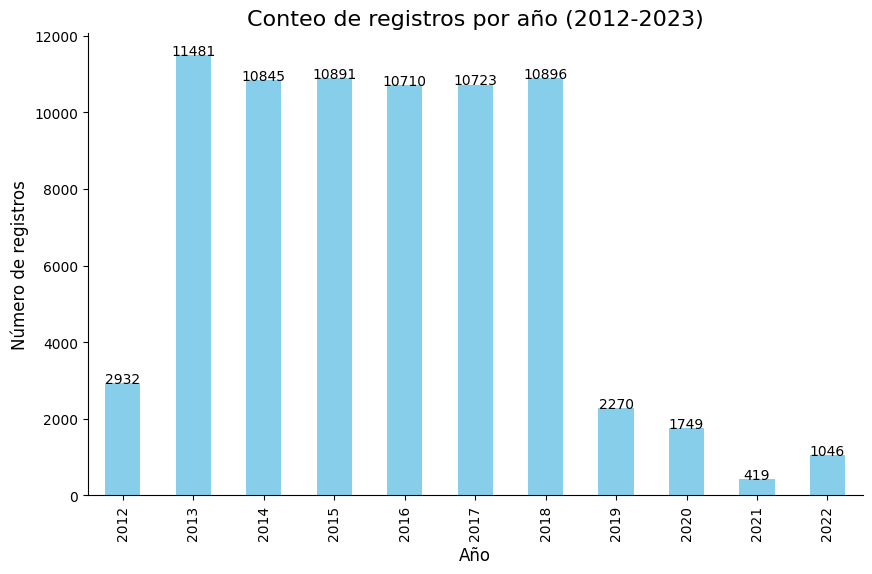

In [ ]:
# Agrupar los datos por 'AÑO' y contar cuántos registros hay por cada año
conteo_por_año = lotico['AÑO'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
conteo_por_año.plot(kind='bar', color='skyblue')

# Configurar el título y las etiquetas de los ejes
plt.title('Conteo de registros por año (2012-2023)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de registros', fontsize=12)

# Mostrar los valores de las barras encima de cada barra
for index, value in enumerate(conteo_por_año):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Ocultar los bordes superior y derecho
plt.gca().spines[['top', 'right']].set_visible(False)

# Mostrar el gráfico
plt.show()


In [ ]:
#Codigo para sacar el total de muestras descargadas
#solo del 2012 al 2021, el conjunto de datos es del 2012 al 2023
#por lo tanto se tiene que excluir el año 2022 y el 2023 y crear
#un nuevo dataframe que se llame lotico_2012_2021 y obtendremos
#el total de muestras de ese periodo

In [ ]:
#Despues de ese conjunto de datos se crea un dataframe que llamaremos
#lotico_2012_2021 y a ese dataframe hay que aplicarle el
#dropna para que nos de el resultado de total de muestras limpias

###Otras estadisticas

In [ ]:
# Agrupar por año y contar los valores de la columna "Water quality" para cada grupo
conteo_por_año = df_lotico_calidad_del_agua.groupby('AÑO')['Calidad del agua'].value_counts().unstack(fill_value=0)

# Definir los nombres de las columnas
nombres_columnas = ['Good', 'Regular', 'Poor']

# Asignar los nombres a las columnas del dataframe
conteo_por_año.columns = nombres_columnas

# Mostrar el resultado
conteo_por_año

,Good,Regular,Poor
AÑO,,,
2012,464,441,694
2013,2592,2907,4085
2014,1666,3527,4176
2015,1847,4773,3190
2016,1896,4560,3160
2017,1865,4533,3445
2018,2308,4078,3667
2019,502,858,765
2020,253,841,555


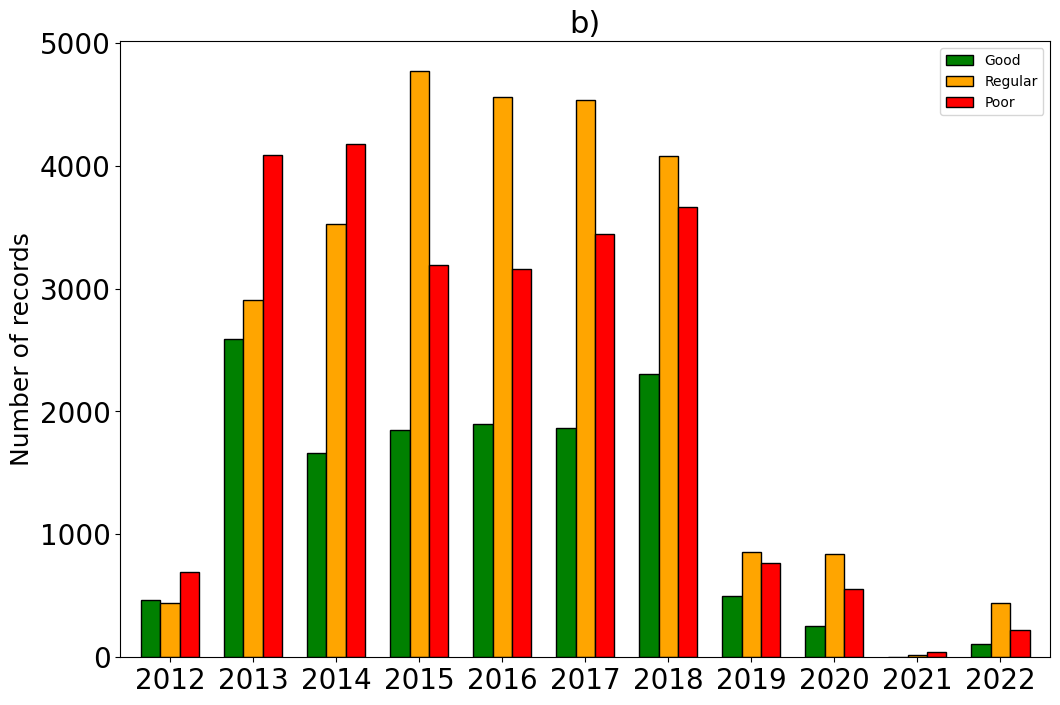

In [ ]:
# Crear el DataFrame con tus datos
data = conteo_por_año  # Esto asume que ya tienes los datos de conteo_por_año
index = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]  # Los años disponibles
df = pd.DataFrame(data, index=index)

# Definir una lista de colores para cada categoría
colores = {
    'Good': 'green',
    'Regular': 'orange',
    'Poor': 'red'
}

# Plot
df.plot(kind='bar', figsize=(12, 8), color=[colores[categoria] for categoria in df.columns], edgecolor='black', width=0.7)

# Configuración de etiquetas y título
plt.title('b)', fontsize=22)  # Título
plt.xlabel('', fontsize=20)  # Etiqueta del eje X
plt.ylabel('Number of records', fontsize=18)  # Etiqueta del eje Y

# Ajustar el tamaño de las etiquetas del eje X e Y
plt.xticks(rotation=0, fontsize=20)  # Etiquetas del eje X
plt.yticks(fontsize=20)  # Etiquetas del eje Y

# Mostrar el gráfico
plt.show()


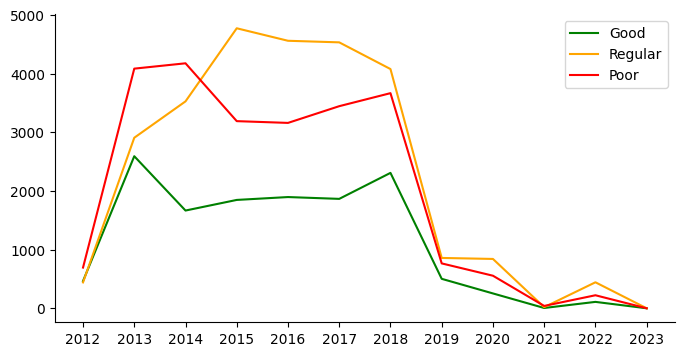

In [ ]:
# Crear un rango de años de 2012 a 2023
rango_anos = pd.Index(range(2012, 2024))

# Asegurarse de que todos los años estén presentes, incluso si faltan datos
conteo_por_año = conteo_por_año.reindex(rango_anos, fill_value=0)

# Trazar las tres líneas en la misma figura
plt.figure(figsize=(8, 4))

# Colores: Verde para 'Buena', Naranja para 'Regular', Rojo para 'Mala'
conteo_por_año['Good'].plot(kind='line', color='green', label='Good')
conteo_por_año['Regular'].plot(kind='line', color='orange', label='Regular')
conteo_por_año['Poor'].plot(kind='line', color='red', label='Poor')

# Configurar el título y etiquetas de los ejes
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Asegurarse de que los años del 2012 al 2023 aparezcan en el eje x
plt.xticks(rotation=0, fontsize=10, ticks=range(2012, 2024), labels=range(2012, 2024))

# Ocultar los bordes superior y derecho
plt.gca().spines[['top', 'right']].set_visible(False)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
conteo_por_año = conteo_por_año.T

In [ ]:
# Obtener el número de valores de la clase Good para el año seleccionado
año = 2015
registros_good = conteo_por_año.loc['Good', año]
print(f"Número de valores de la clase Good en el año {año}:", registros_good)

Número de valores de la clase Good en el año 2015: 1847


In [ ]:
# Obtener el número de valores de la clase Regular para el año seleccionado
año = 2015
registros_regular = conteo_por_año.loc['Regular', año]
print(f"Número de valores de la clase Regular en el año {año}:", registros_regular)

Número de valores de la clase Regular en el año 2015: 4773


In [ ]:
# Obtener el número de valores de la clase Good para el año seleccionado
año = 2015
registros_poor = conteo_por_año.loc['Poor', año]
print(f"Número de valores de la clase Poor en el año {año}:", registros_poor)

Número de valores de la clase Poor en el año 2015: 3190


##Statistical Analysis of Lotic Body

###Union de dataframes

In [ ]:
# Unir los DataFrames a través de la columna "CLAVE SITIO"
lotico_contaminants_combined = pd.merge(
    lotico_preprocesado,  # DataFrame principal
    lotico_sites[['CLAVE SITIO', 'ORGANISMO CUENCA']],  # Seleccionar solo las columnas necesarias del otro DataFrame
    on='CLAVE SITIO',  # Columna común para realizar la unión
    how='left'  # Tipo de unión: 'left' conserva todos los registros del DataFrame principal
)

# Mostrar el DataFrame resultante
#print(lotico_contaminants_combined)


In [ ]:
lotico_contaminants_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64486 entries, 0 to 64485
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  float64       
 7   CF                   64486 non-null  float64       
 8   E_COLI               64486 non-null  float64       
 9   OD%                  64486 non-null  float64       
 10  DBO5                 64486 non-null  float64       
 11  DQO                  64486 non-null  float64       
 12  TOX_D48              64486 non-null  float64       
 13  TOX_V15              64486 non-

In [ ]:
# Filtrar valores entre 2012 y 2022 (inclusive)
lotico_contaminants_combined_2022 = lotico_contaminants_combined[(lotico_contaminants_combined['AÑO'] >= 2012) & (lotico_contaminants_combined['AÑO'] <= 2022)]

In [ ]:
lotico_contaminants_combined_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64486 entries, 0 to 64485
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  float64       
 7   CF                   64486 non-null  float64       
 8   E_COLI               64486 non-null  float64       
 9   OD%                  64486 non-null  float64       
 10  DBO5                 64486 non-null  float64       
 11  DQO                  64486 non-null  float64       
 12  TOX_D48              64486 non-null  float64       
 13  TOX_V15              64486 non-

###No cumplimiento

####Porcentaje de no cumplimiento por contaminante y cuenca

In [ ]:
df2 = lotico_contaminants_combined_2022.copy()

limits2 = {
    'SST': lambda x: x > 150,
    'CF': lambda x: x > 1000,
    'E_COLI': lambda x: x > 850,
    'OD%': lambda x: x <= 30 or x > 130,
    'DBO5': lambda x: x > 30,
    'DQO': lambda x: x > 40,
    'TOX_D48': lambda x: x >= 5,
    'TOX_V15': lambda x: x >= 5
}

# Crear una columna de no cumplimiento para cada parámetro
for col, condition in limits2.items():
    df2[f'{col}_no_cumple'] = df2[col].apply(condition)

# Calcular el porcentaje de no cumplimiento por parámetro para cada cuenca
non_compliance_summary = pd.DataFrame()
for col in limits2.keys():
    non_compliance_summary[col] = df2.groupby('ORGANISMO CUENCA')[f'{col}_no_cumple'].mean() * 100

# Mostrar el DataFrame con los resultados de no cumplimiento
non_compliance_summary.to_excel('porcentaje_lotico_no_cumplimiento_limites.xlsx')

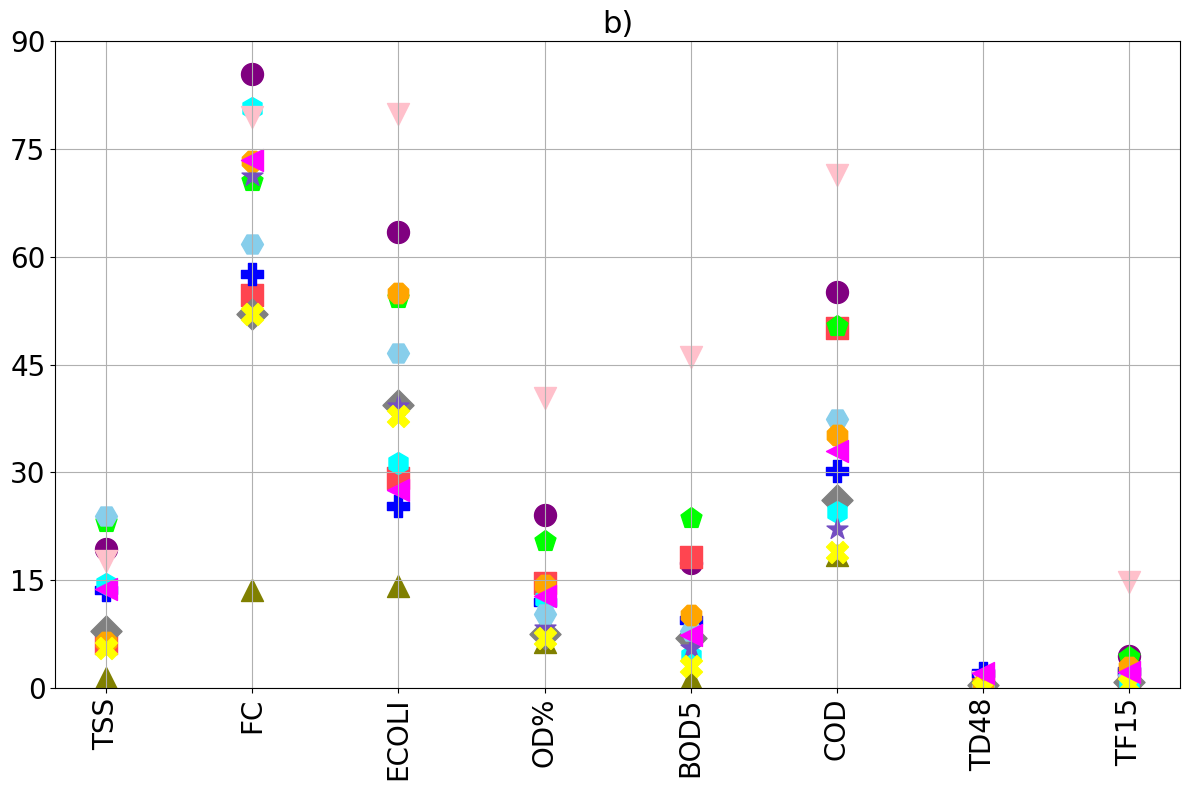

In [ ]:
df2 = lotico_contaminants_combined_2022.copy()

limits2 = {
    'SST': lambda x: x <= 150,
    'CF': lambda x: x <= 1000,
    'E_COLI': lambda x: x <= 850,
    'OD%': lambda x: 30 < x <= 130,
    'DBO5': lambda x: x <= 30,
    'DQO': lambda x: x <= 40,
    'TOX_D48': lambda x: x < 5,
    'TOX_V15': lambda x: x < 5
}

# Crear una columna de cumplimiento para cada parámetro
for col, condition in limits2.items():
    df2[f'{col}'] = df2[col].apply(condition)

# Calcular el porcentaje de no cumplimiento por parámetro para cada cuenca
compliance_summary2 = pd.DataFrame()
for col in limits2.keys():
    compliance_summary2[col] = df2.groupby('ORGANISMO CUENCA')[f'{col}'].mean() * 100

# Diccionario para reemplazar los nombres de las columnas por nombres descriptivos
column_names_mapping2 = {
    'SST': 'TSS',
    'CF': 'FC',
    'E_COLI': 'ECOLI',
    'OD%': 'OD%',
    'DBO5': 'BOD5',
    'DQO': 'COD',
    'TOX_D48': 'TD48',
    'TOX_V15': 'TF15'
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Asumiendo que cuencas_colors_markers es tu diccionario de asignación de colores y formas para cada cuenca
cuencas2 = {
    'LERMA SANTIAGO PACÍFICO': ('#800080', 'o'),
    'PENÍNSULA DE BAJA CALIFORNIA': ('#FF4550', 's'),
    'PENÍNSULA DE YUCATÁN': ('#808000', '^'),
    'RÍO BRAVO': ('#808080', 'D'),
    'CUENCAS CENTRALES DEL NORTE': ('#0000FF', 'P'),
    'PACÍFICO NORTE': ('#00FFFF', 'h'),
    'AGUAS DEL VALLE DE MÉXICO': ('#FFC0CB', 'v'),
    'BALSAS': ('#00FF00', 'p'),
    'GOLFO NORTE': ('#744EC2', '*'),
    'PACÍFICO SUR': ('#87CEEB', 'H'),
    'GOLFO CENTRO': ('#FFA500', '8'),
    'FRONTERA SUR': ('#FFFF00', 'X'),
    'NOROESTE': ('#FF00FF', '<'),
}

# Plotear los puntos para cada cuenca y parámetro
for cuenca in cuencas2:
    for j, col in enumerate(limits2.keys()):
        color, marker = cuencas2.get(cuenca, ('gray', 'o'))  # Obtener el color y la forma correspondientes
        ax.scatter(
            [column_names_mapping2[col]],
            [100 - compliance_summary2.loc[cuenca, col]],
            marker=marker,
            color=color,
            label=f'{cuenca}' if j == 0 else "",
            s=250
        )

# Configuración del eje Y
ax.set_ylim(0, 45)
ax.set_yticks([0, 15, 30, 45, 60, 75, 90])
ax.set_ylabel('', fontsize=20)

# Cambiar el tamaño de fuente de las etiquetas del eje Y
ax.tick_params(axis='y', labelsize=20)

# Configuración del eje X
ax.set_xlabel('', fontsize=14, fontweight='bold')
ax.set_xticks(list(column_names_mapping2.values()))
ax.set_xticklabels(list(column_names_mapping2.values()), fontsize=16, rotation=90)
ax.tick_params(axis='x', labelsize=20)  # Tamaño de fuente del eje X


# Título y leyenda
ax.set_title('b)', fontsize=22)

# Ajustar la leyenda para evitar duplicados y posicionarla fuera del gráfico
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#ax.legend(by_label.values(), by_label.keys(), title='Cuencas', title_fontsize=14, fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)

plt.grid(True)
plt.tight_layout()
plt.show()


####Número total de registros de no cumplimiento por contaminante y cuenca

In [ ]:
df1 = lotico_contaminants_combined_2022.copy()

# Definir los límites con funciones lambda
limits1 = {
    'SST': lambda x: x <= 150,
    'CF': lambda x: x <= 1000,
    'E_COLI': lambda x: x <= 850,
    'OD%': lambda x: 30 < x <= 130,
    'DBO5': lambda x: x <= 30,
    'DQO': lambda x: x <= 40,
    'TOX_D48': lambda x: x < 5,
    'TOX_V15': lambda x: x < 5
}

# Crear una columna de no cumplimiento para cada parámetro
for col, condition in limits1.items():
    df1[f'{col}_no_cumple'] = df1[col].apply(condition)

# Calcular el número total de no cumplimiento por parámetro para cada cuenca
non_compliance_summary1 = pd.DataFrame()
for col in limits1.keys():
    non_compliance_summary1[col] = df1.groupby('ORGANISMO CUENCA')[f'{col}_no_cumple'].sum()

# Mostrar el DataFrame con los resultados de no cumplimiento
non_compliance_summary1.to_excel('total_lotico_no_cumplimiento_limites.xlsx')

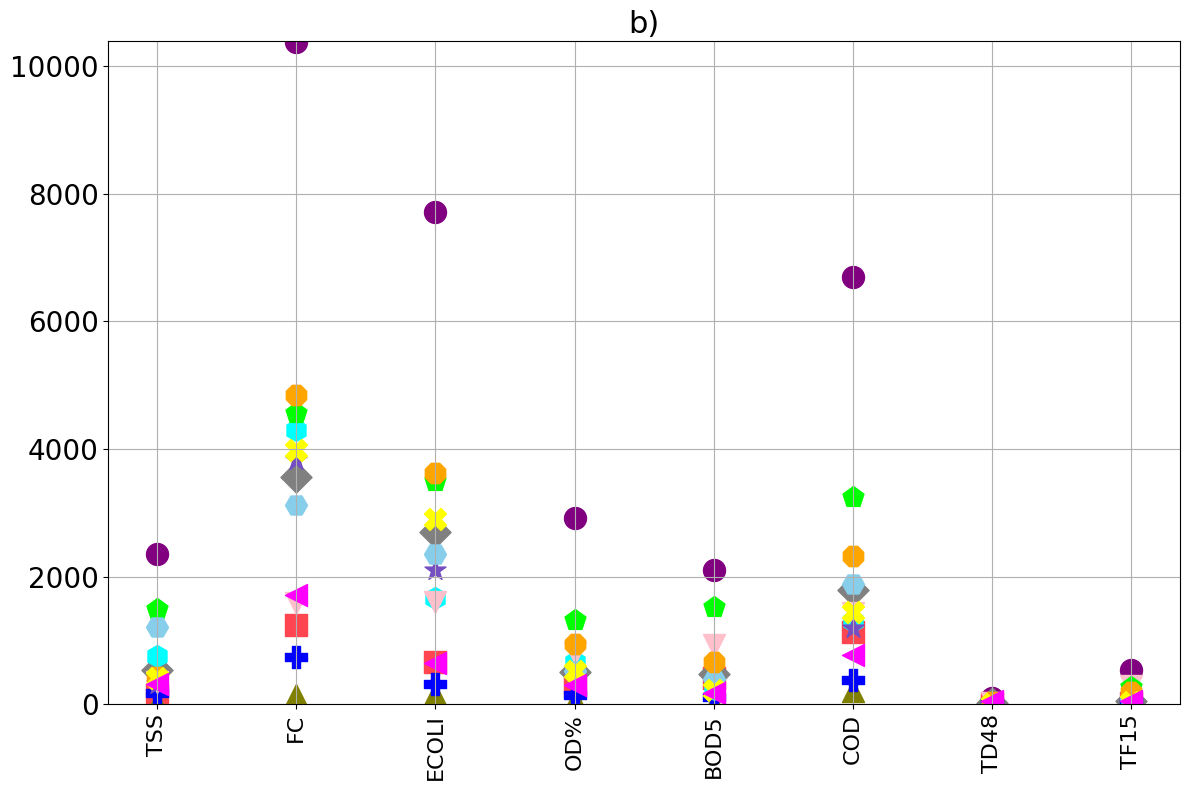

In [ ]:
df1 = lotico_contaminants_combined_2022.copy()

# Definir los límites con funciones lambda
limits1 = {
    'SST': lambda x: x <= 150,
    'CF': lambda x: x <= 1000,
    'E_COLI': lambda x: x <= 850,
    'OD%': lambda x: 30 < x <= 130,
    'DBO5': lambda x: x <= 30,
    'DQO': lambda x: x <= 40,
    'TOX_D48': lambda x: x < 5,
    'TOX_V15': lambda x: x < 5
}

# Crear una columna de cumplimiento para cada parámetro
for col, condition in limits1.items():
    df1[f'{col}'] = df1[col].apply(condition)

# Calcular el número total de no cumplimiento por parámetro para cada cuenca
non_compliance_summary1 = pd.DataFrame()
for col in limits1.keys():
    non_compliance_summary1[col] = df1.groupby('ORGANISMO CUENCA')[f'{col}'].apply(lambda x: x.size - x.sum())

# Diccionario para reemplazar los nombres de las columnas por nombres descriptivos
column_names_mapping = {
    'SST': 'TSS',
    'CF': 'FC',
    'E_COLI': 'ECOLI',
    'OD%': 'OD%',
    'DBO5': 'BOD5',
    'DQO': 'COD',
    'TOX_D48': 'TD48',
    'TOX_V15': 'TF15'
}

# Crear el gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Asumiendo que cuencas_colors_markers es tu diccionario de asignación de colores y formas para cada cuenca
cuencas1 = {
    'LERMA SANTIAGO PACÍFICO': ('#800080', 'o'),
    'PENÍNSULA DE BAJA CALIFORNIA': ('#FF4550', 's'),
    'PENÍNSULA DE YUCATÁN': ('#808000', '^'),
    'RÍO BRAVO': ('#808080', 'D'),
    'CUENCAS CENTRALES DEL NORTE': ('#0000FF', 'P'),
    'PACÍFICO NORTE': ('#00FFFF', 'h'),
    'AGUAS DEL VALLE DE MÉXICO': ('#FFC0CB', 'v'),
    'BALSAS': ('#00FF00', 'p'),
    'GOLFO NORTE': ('#744EC2', '*'),
    'PACÍFICO SUR': ('#87CEEB', 'H'),
    'GOLFO CENTRO': ('#FFA500', '8'),
    'FRONTERA SUR': ('#FFFF00', 'X'),
    'NOROESTE': ('#FF00FF', '<'),
}

# Plotear los puntos para cada cuenca y parámetro
for cuenca in cuencas1:
    for j, col in enumerate(limits1.keys()):
        color, marker = cuencas1.get(cuenca, ('gray', 'o'))  # Obtener el color y la forma correspondientes
        ax.scatter(
            [column_names_mapping[col]],
            [non_compliance_summary1.loc[cuenca, col]],
            marker=marker,
            color=color,
            label=f'{cuenca}' if j == 0 else "",
            s=250
        )

# Configuración del eje Y
ax.set_ylim(0, non_compliance_summary1.values.max() + 5)
ax.set_ylabel('', fontsize=20)

# Cambiar el tamaño de fuente de las etiquetas del eje Y
ax.tick_params(axis='y', labelsize=20)

# Configuración del eje X
ax.set_xlabel('', fontsize=14, fontweight='bold')
ax.set_xticks(list(column_names_mapping.values()))
ax.set_xticklabels(list(column_names_mapping.values()), fontsize=16, rotation=90)

# Título y leyenda
ax.set_title('b)', fontsize=22)

# Ajustar la leyenda para evitar duplicados y posicionarla fuera del gráfico
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#ax.legend(by_label.values(), by_label.keys(), title='Cuencas', title_fontsize=14, fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64486 entries, 0 to 64485
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          64486 non-null  object        
 1   CLAVE MONITOREO      64486 non-null  object        
 2   NOMBRE DEL SITIO     64486 non-null  object        
 3   TIPO CUERPO DE AGUA  64486 non-null  object        
 4   FECHA REALIZACIÓN    64486 non-null  datetime64[ns]
 5   AÑO                  64486 non-null  object        
 6   SST                  64486 non-null  bool          
 7   CF                   64486 non-null  bool          
 8   E_COLI               64486 non-null  bool          
 9   OD%                  64486 non-null  bool          
 10  DBO5                 64486 non-null  bool          
 11  DQO                  64486 non-null  bool          
 12  TOX_D48              64486 non-null  bool          
 13  TOX_V15              64486 non-

##Data visualization

In [ ]:
df_2012_al_2021_sp = df_2012_al_2021_sp.iloc[:, 6:20]
df_2012_al_2022_sp = df_2012_al_2022_sp.iloc[:, 6:20]
df_2012_al_2023_sp = df_2012_al_2023_sp.iloc[:, 6:20]

In [ ]:
df_2012_al_2021_p = df_2012_al_2021_p.iloc[:, 6:20]
df_2012_al_2022_p = df_2012_al_2022_p.iloc[:, 6:20]
df_2012_al_2023_p = df_2012_al_2023_p.iloc[:, 6:20]

In [ ]:
# Diccionario para renombrar las columnas
nombres_columnas = {
    'SST': 'TSS',
    'CF': 'FC',
    'E_COLI': 'ECOLI',
    'OD%': 'OD%',
    'DBO5': 'BOD5',
    'DQO': 'COD',
    'TOX_D48': 'TD48',
    'TOX_V15': 'TF15'
}

# Renombrar las columnas
df_2012_al_2021_sp = df_2012_al_2021_sp.rename(columns=nombres_columnas)

# Renombrar las columnas
df_2012_al_2021_p = df_2012_al_2021_p.rename(columns=nombres_columnas)

###Mapa de calor de simbolos > y <

####al 2021

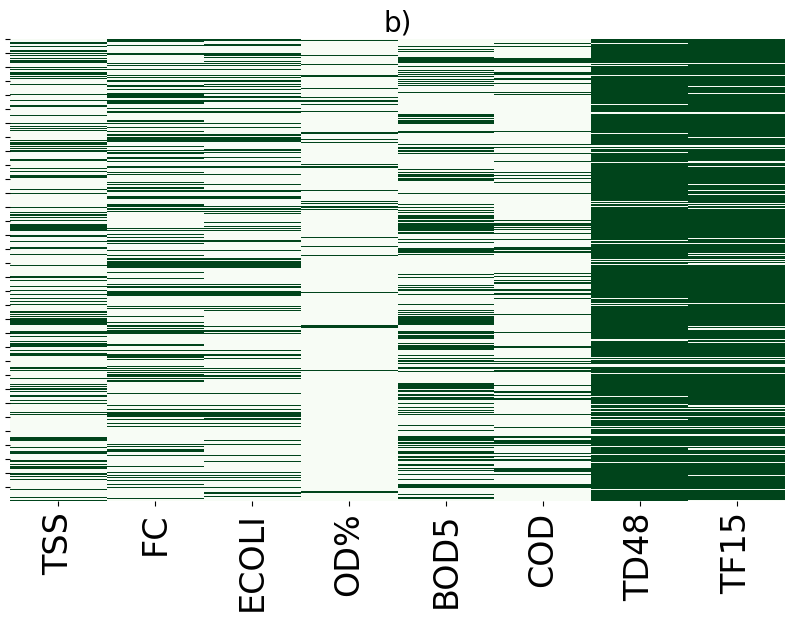

In [ ]:
# Crear una matriz booleana donde True indica presencia de < o >
bool_matrix = df_2012_al_2021_sp.applymap(lambda x: '<' in str(x) or '>' in str(x))

# Crear un heatmap de la matriz booleana para todas las columnas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Generar el heatmap basado en la matriz booleana
heatmap = sns.heatmap(bool_matrix, cbar=False, cmap='Greens')  # Usar 'Greens'

# Rotar las etiquetas del eje X 90 grados y aumentar el tamaño de la fuente
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=24)

# Establecer las etiquetas del eje Y a una lista vacía para eliminarlas
heatmap.set_yticklabels([])

# Configurar el título y la etiqueta del eje X
plt.title('b)', loc='center', fontsize=20)
plt.xlabel('', loc='center', fontsize=20)

# Mostrar el heatmap
plt.show()


####al 2022

####al 2023

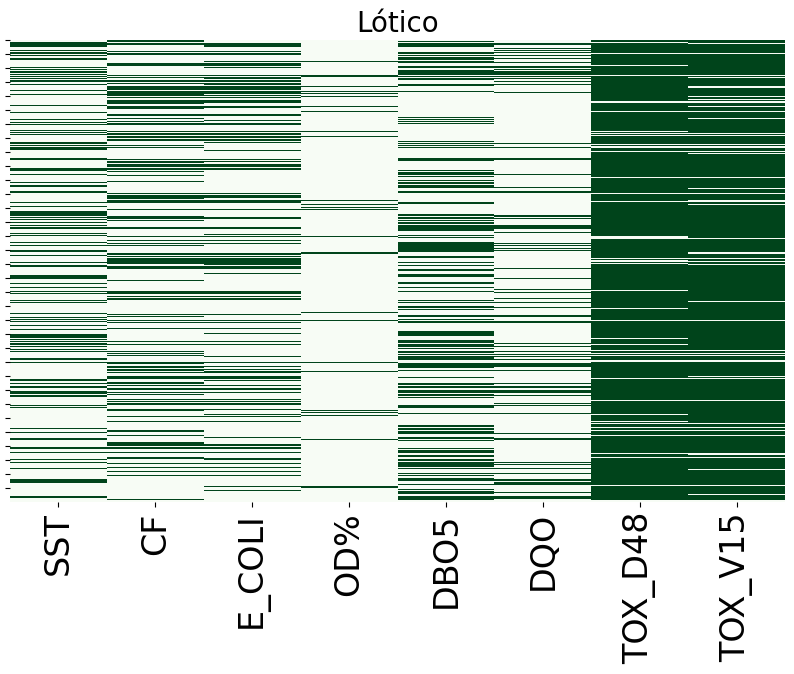

In [ ]:
# Crear una matriz booleana donde True indica presencia de < o >
bool_matrix = df_2012_al_2023_sp.applymap(lambda x: '<' in str(x) or '>' in str(x))

# Crear un heatmap de la matriz booleana para todas las columnas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Generar el heatmap basado en la matriz booleana
heatmap = sns.heatmap(bool_matrix, cbar=False, cmap='Greens')  # Usar 'Greens'

# Rotar las etiquetas del eje X 90 grados y aumentar el tamaño de la fuente
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=24)

# Establecer las etiquetas del eje Y a una lista vacía para eliminarlas
heatmap.set_yticklabels([])

# Configurar el título y la etiqueta del eje X
plt.title('Lótico', loc='center', fontsize=20)
plt.xlabel('', loc='center', fontsize=20)

# Mostrar el heatmap
plt.show()


###Mapa de calor de valores nulos

####al 2021

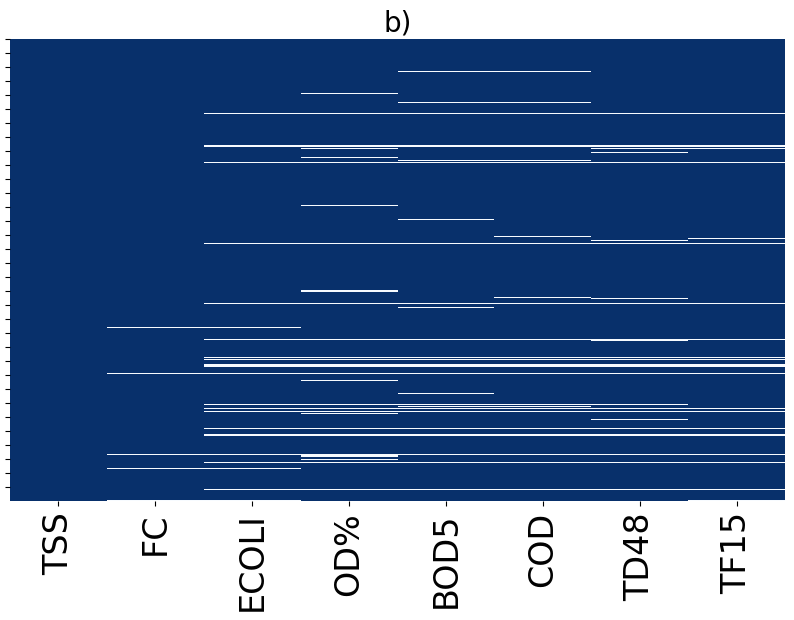

In [ ]:
# Seleccionar las columnas que deseas incluir en el mapa de calor
columnas_seleccionadas_lotico = df_2012_al_2021_sp.columns  # Reemplaza con el rango de nombres de columnas que deseas

# Crear un mapa de calor de valores faltantes para todas las columnas del DataFrame
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Generar un mapa de calor mostrando la presencia de valores faltantes
heatmap = sns.heatmap(df_2012_al_2021_sp.isnull(), cbar=False, cmap='Blues_r')

# Rotar las etiquetas del eje x 90 grados para que sean verticales y aumentar el tamaño de la fuente
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=24)

# Establecer las etiquetas del eje y como una lista vacía para eliminarlas
heatmap.set_yticklabels([])

plt.title('b)', loc='center', fontsize=20)  # Título del gráfico
plt.xlabel('', loc='center', fontsize=20)  # Etiqueta del eje x
plt.show()  # Muestra el gráfico

####al 2022

####al_2023

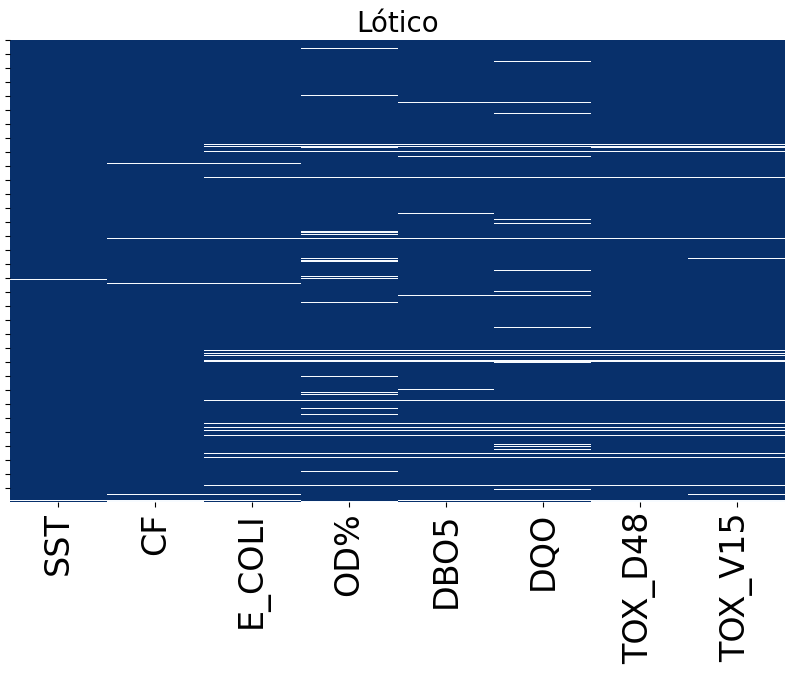

In [ ]:
# Seleccionar las columnas que deseas incluir en el mapa de calor
columnas_seleccionadas_lotico = df_2012_al_2023_sp.columns  # Reemplaza con el rango de nombres de columnas que deseas

# Crear un mapa de calor de valores faltantes solo para las columnas seleccionadas
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Genera un mapa de calor que muestra la presencia de valores faltantes en las columnas seleccionadas
heatmap = sns.heatmap(df_2012_al_2023_sp[columnas_seleccionadas_lotico].isnull(), cbar=False, cmap='Blues_r')

# Rotea las etiquetas del eje x 90 grados para que sean verticales y aumenta el tamaño de la fuente
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90, fontsize=24)

# Establece las etiquetas del eje y como una lista vacía para eliminarlas
heatmap.set_yticklabels([])

plt.title('Lótico', loc='center', fontsize=20)  # Título del gráfico
plt.xlabel('', loc='center', fontsize=20)  # Etiqueta del eje x
plt.show()  # Muestra el gráfico


###Mapa de calor de correlación de valores nulos entre contaminantes

####al 2021

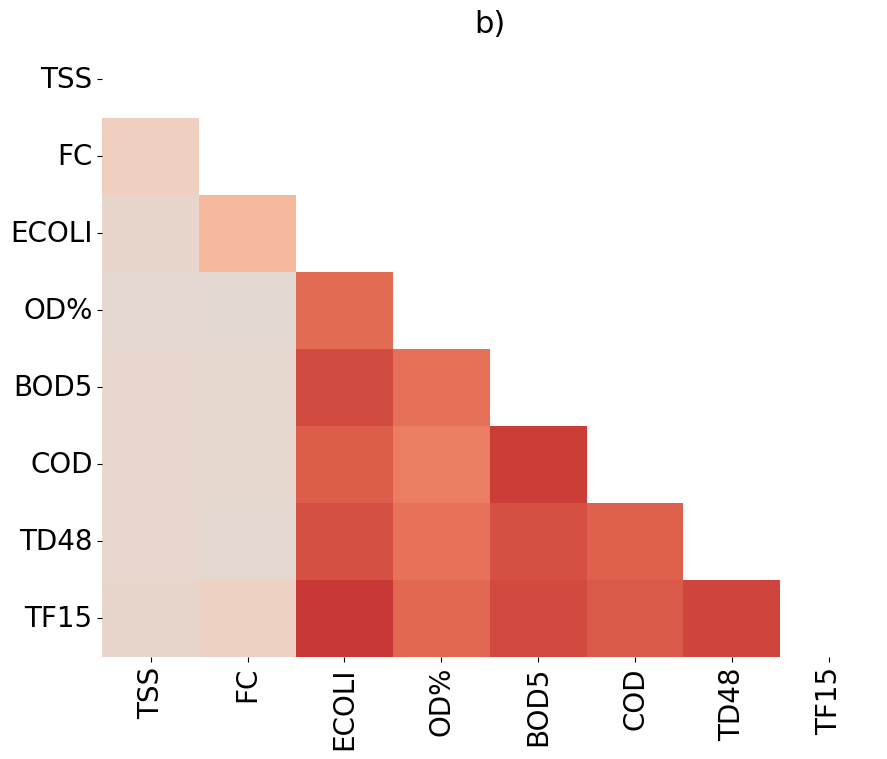

In [ ]:
# Crear un DataFrame que indica dónde están los valores nulos
df = pd.DataFrame(df_2012_al_2021_sp)

# Calcular la correlación entre valores nulos
null_df = df.isnull()
null_corr_matrix = null_df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(null_corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(null_corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('b)', fontsize=22)
plt.show()


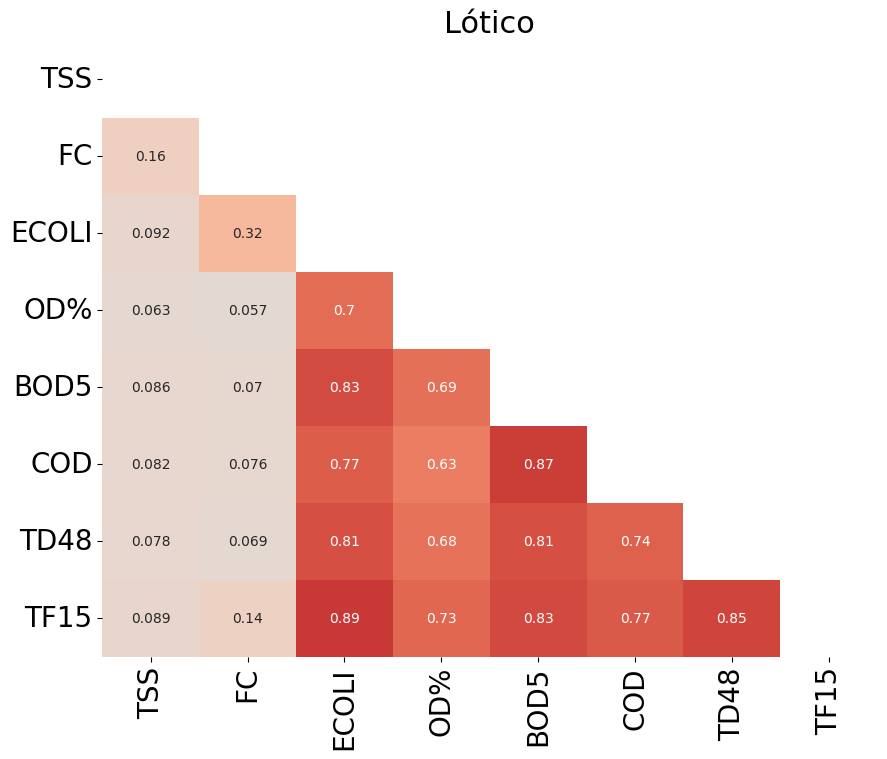

In [ ]:
# Crear un DataFrame que indica dónde están los valores nulos
df = pd.DataFrame(df_2012_al_2021_sp)

# Calcular la correlación entre valores nulos
null_df = df.isnull()
null_corr_matrix = null_df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(null_corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(null_corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico', fontsize=22)
plt.show()

####al 2022

####al 2023

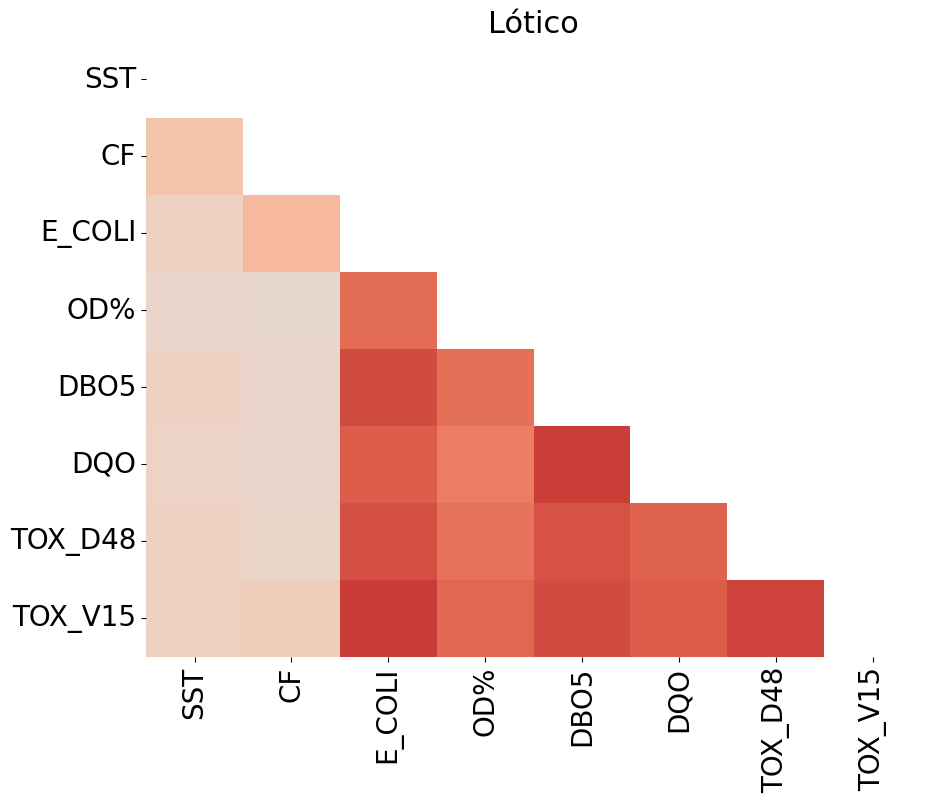

In [ ]:
# Crear un DataFrame que indica dónde están los valores nulos
df = pd.DataFrame(df_2012_al_2023_sp)

# Calcular la correlación entre valores nulos
null_df = df.isnull()
null_corr_matrix = null_df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(null_corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(null_corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico', fontsize=22)
plt.show()


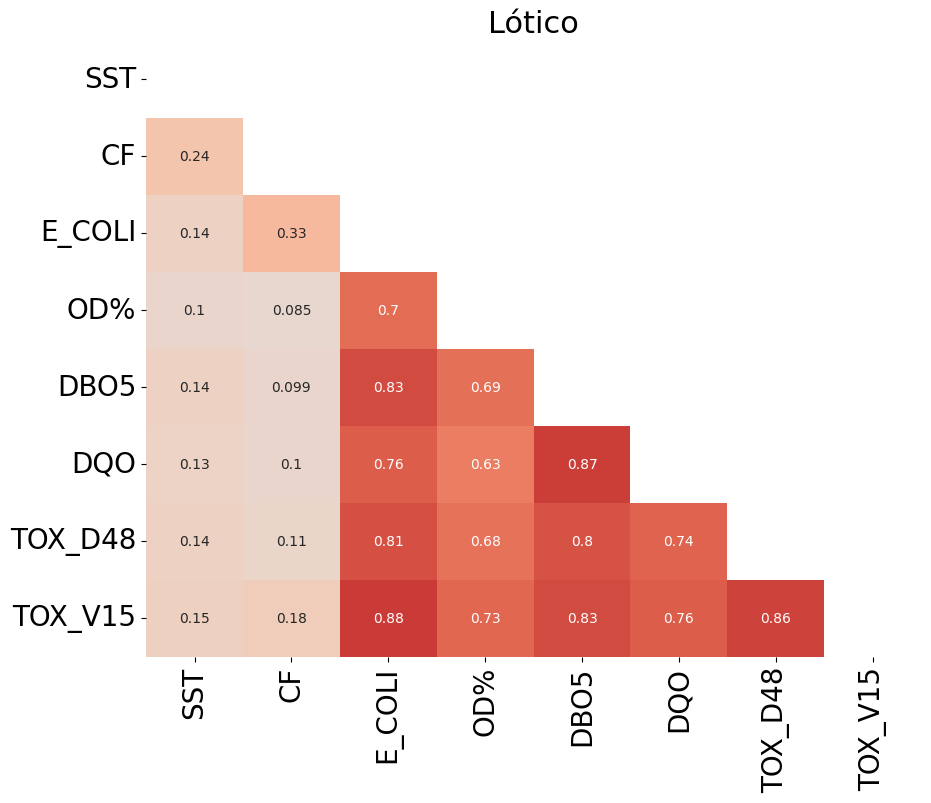

In [ ]:
# Crear un DataFrame que indica dónde están los valores nulos
df = pd.DataFrame(df_2012_al_2023_sp)

# Calcular la correlación entre valores nulos
null_df = df.isnull()
null_corr_matrix = null_df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(null_corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(null_corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False)

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico', fontsize=22)
plt.show()

###Mapa de calor de correlación lineal

####al 2021

#####Coeficiente de correlación de Pearson

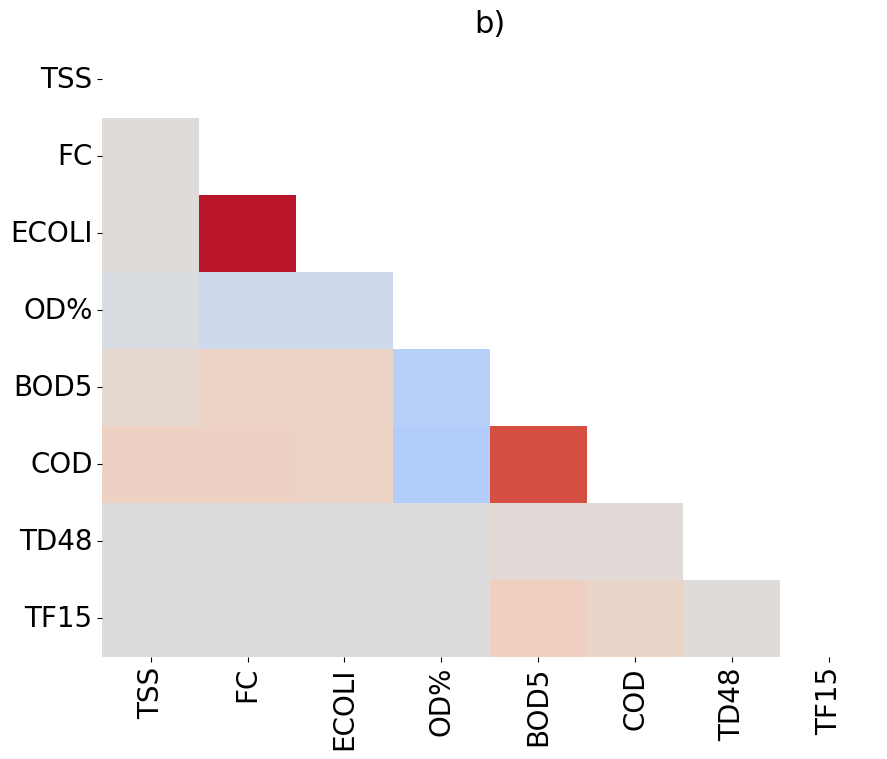

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2021_p)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('b)', fontsize=22)

# Mostrar el gráfico
plt.show()

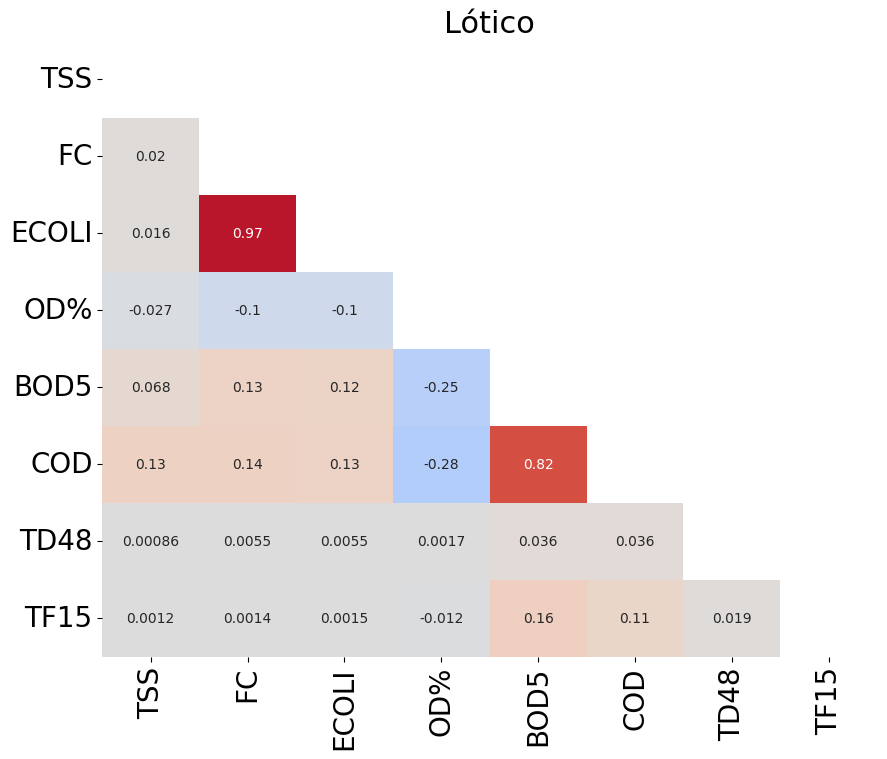

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2021_p)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico', fontsize=22)

# Mostrar el gráfico
plt.show()

#####Coeficiente de correlación de Spearman

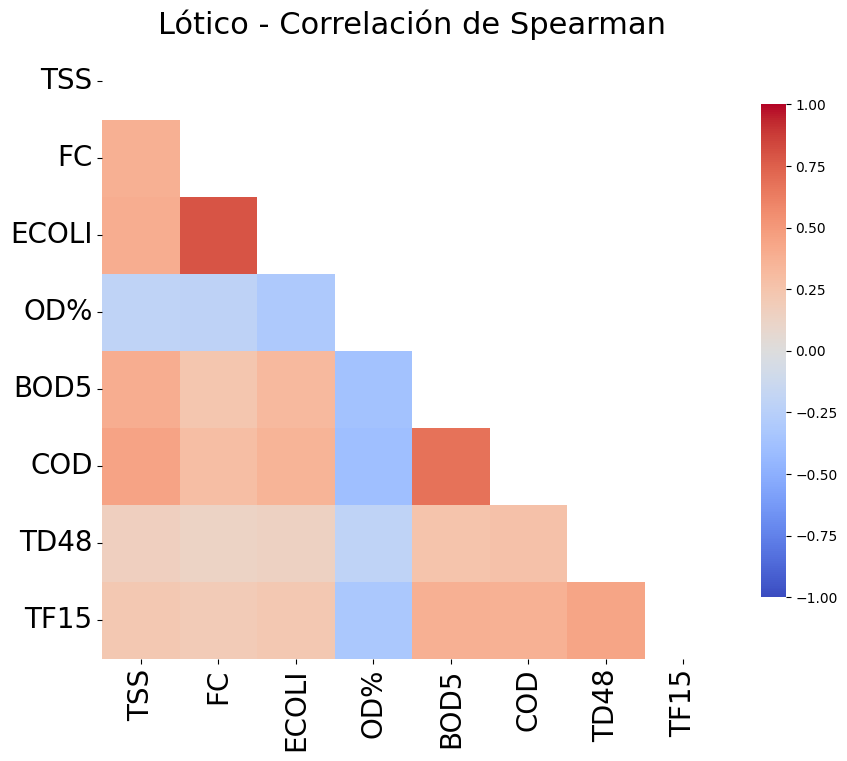

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2021_p)

# Calcular la matriz de correlación utilizando Spearman
corr_matrix = df.corr(method='spearman')

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico - Correlación de Spearman', fontsize=22)

# Mostrar el gráfico
plt.show()


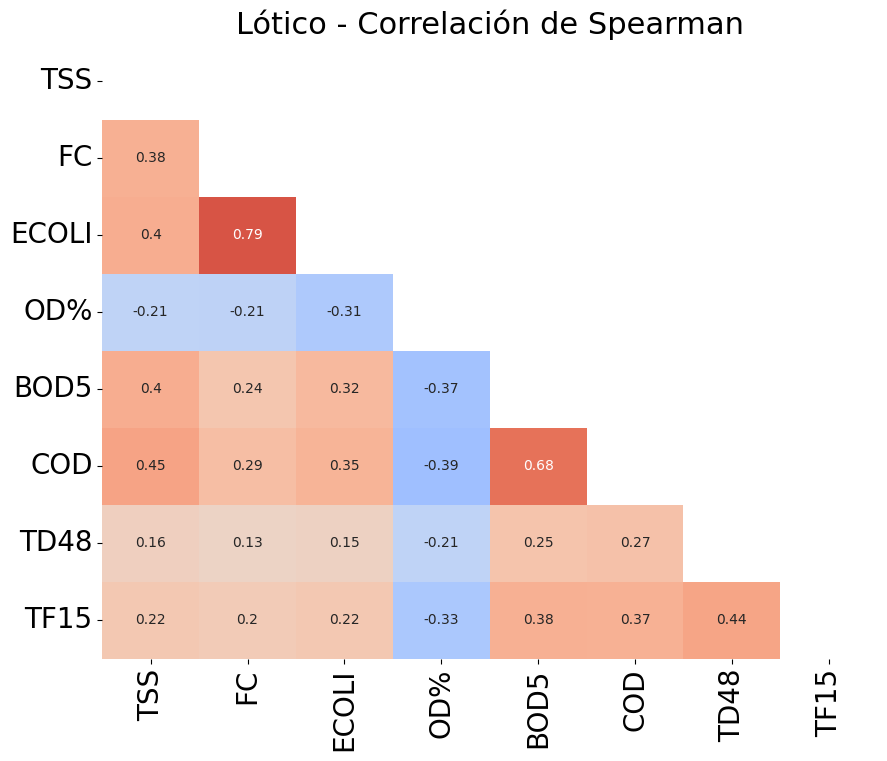

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2021_p)

# Calcular la matriz de correlación utilizando Spearman
corr_matrix = df.corr(method='spearman')

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico - Correlación de Spearman', fontsize=22)

# Mostrar el gráfico
plt.show()


####al 2022

####al 2023

#####Coeficiente de correlación de Pearson

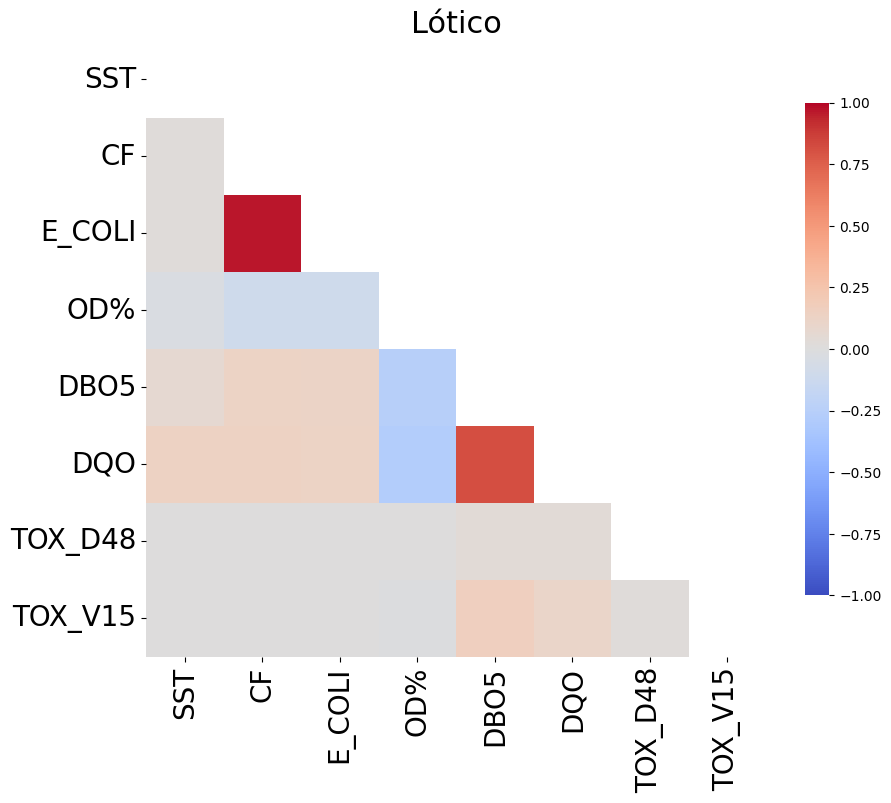

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2023_p)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico', fontsize=22)

# Mostrar el gráfico
plt.show()

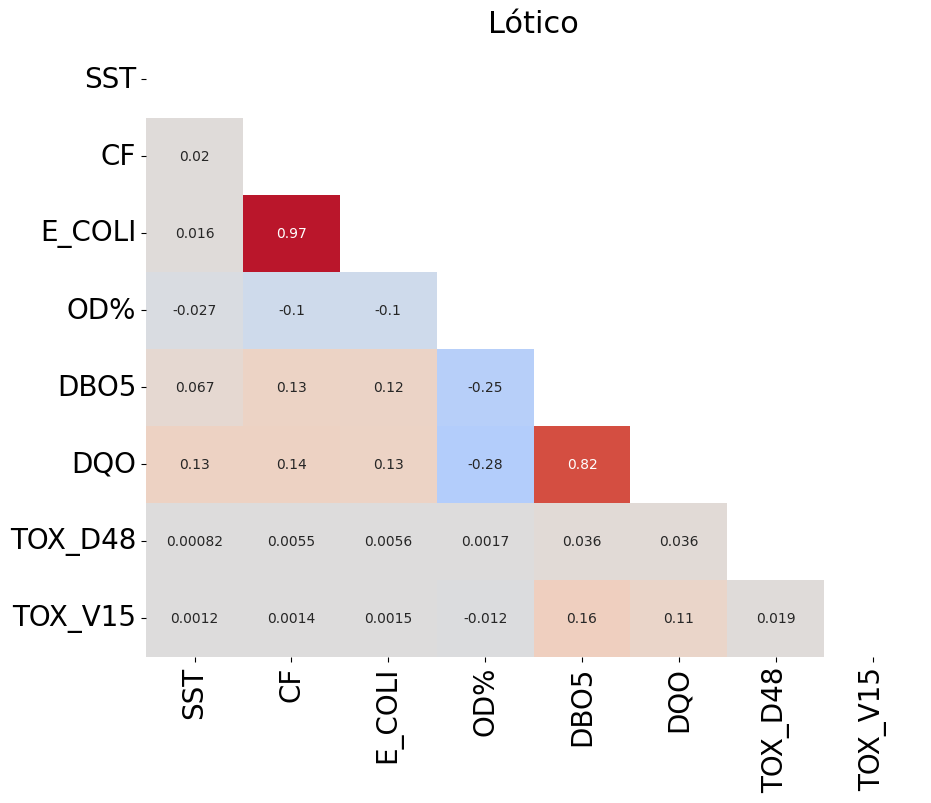

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2023_p)

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico', fontsize=22)

# Mostrar el gráfico
plt.show()

#####Coeficiente de correlación de Spearman

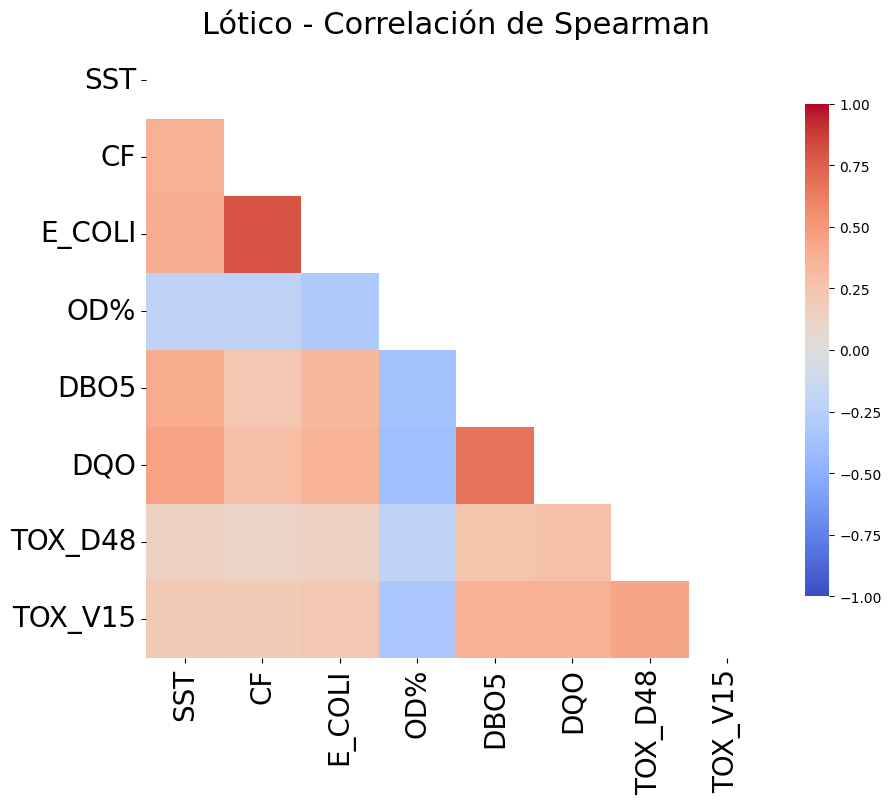

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2023_p)

# Calcular la matriz de correlación utilizando Spearman
corr_matrix = df.corr(method='spearman')

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico - Correlación de Spearman', fontsize=22)

# Mostrar el gráfico
plt.show()


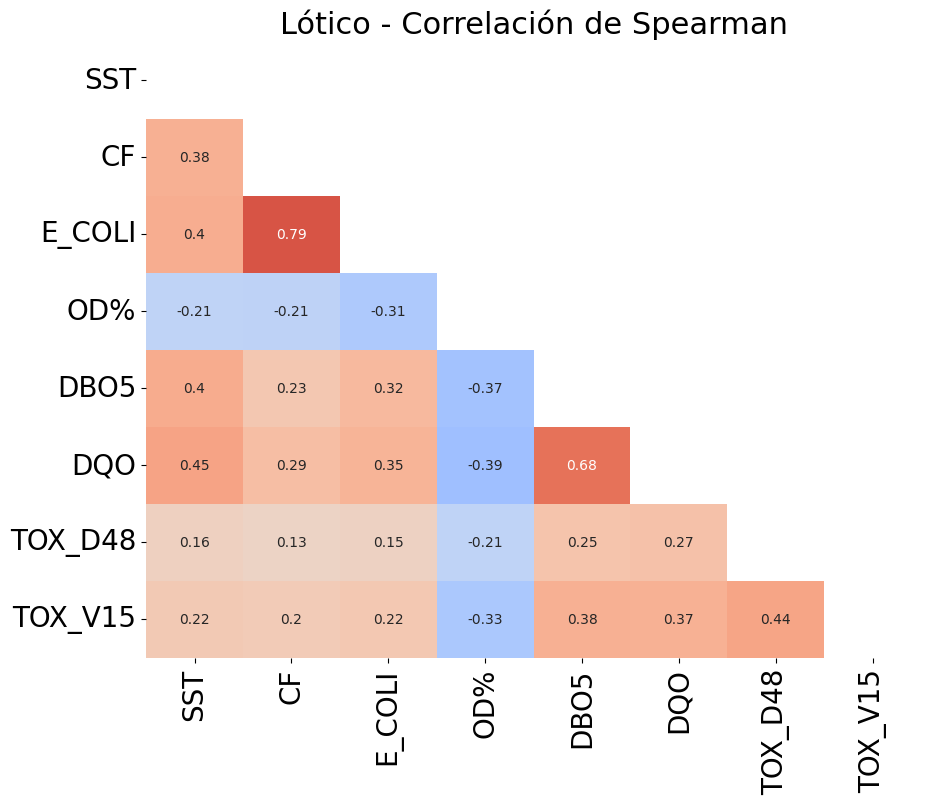

In [ ]:
# Crear un DataFrame
df = pd.DataFrame(df_2012_al_2023_p)

# Calcular la matriz de correlación utilizando Spearman
corr_matrix = df.corr(method='spearman')

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Establecer el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Dibujar el mapa de calor con la máscara y los valores de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=False, cbar_kws={'shrink': .8})

# Ajustar el tamaño y la rotación de las etiquetas del eje x y del eje y
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Añadir el título
plt.title('Lótico - Correlación de Spearman', fontsize=22)

# Mostrar el gráfico
plt.show()


###Mapa de calor de correlacion entre variables independientes y variable objetivo

####al 2021

Matriz de coeficientes Eta:
       Water quality
TSS         0.147751
FC          0.077722
ECOLI       0.075639
OD%         0.338459
BOD5        0.219994
COD         0.313304
TD48        0.032949
TF15        0.010453


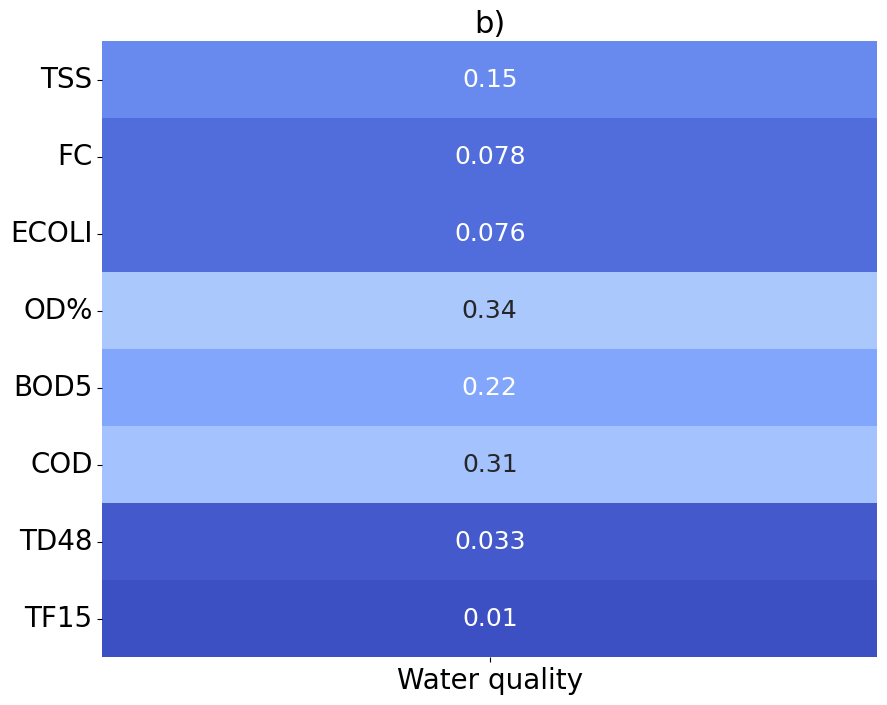

In [ ]:
# Función para calcular el coeficiente Eta
def coeficiente_eta(categorica, numerica):
    categorias = categorica.unique()
    medias_grupo = numerica.groupby(categorica).mean()
    media_total = numerica.mean()

    # Suma de cuadrados entre grupos
    ss_between = sum(categorica.value_counts()[cat] * (medias_grupo[cat] - media_total)**2 for cat in categorias)
    # Suma de cuadrados totales
    ss_total = sum((numerica - media_total)**2)

    # Coeficiente Eta
    eta = np.sqrt(ss_between / ss_total)
    return eta

# Función para calcular y graficar el mapa de calor del coeficiente Eta
def graficar_coeficiente_eta(df, variable_categorica, variables_numericas, nombres_mostrados=None):
    # Si se proporcionan nombres renombrados, construir un diccionario para mapear
    if nombres_mostrados:
        nombres_dict = dict(zip(variables_numericas, nombres_mostrados))
    else:
        nombres_dict = {col: col for col in variables_numericas}  # Mismos nombres si no se proporcionan nuevos

    # Crear una matriz de coeficientes Eta
    eta_matrix = pd.DataFrame(index=nombres_mostrados if nombres_mostrados else variables_numericas,
                              columns=["Water quality"])  # Cambiar el título de la columna a "Water quality"

    for var in variables_numericas:
        eta_matrix.loc[nombres_dict[var], "Water quality"] = coeficiente_eta(df[variable_categorica], df[var])

    # Convertir a tipo float para visualización
    eta_matrix = eta_matrix.astype(float)

    # Imprimir los valores calculados
    print("Matriz de coeficientes Eta:")
    print(eta_matrix)

    # Crear un mapa de calor
    plt.figure(figsize=(10, 8))
    # Aumentar el tamaño de la letra de las anotaciones
    sns.heatmap(eta_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, cbar=False, cbar_kws={'shrink': 0.8},
                annot_kws={'size': 18})  # Puedes cambiar el valor de 'size' para hacer el texto más grande

    # Personalización del gráfico
    plt.title('b)', fontsize=22)
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(rotation=0, fontsize=20)
    plt.xlabel("", fontsize=20)  # Cambiar etiqueta del eje x
    plt.show()

# Ejemplo de uso con nombres personalizados:
graficar_coeficiente_eta(
    df=df_lotico_calidad_del_agua_2021,
    variable_categorica='Calidad del agua',
    variables_numericas=['SST', 'CF', 'E_COLI', 'OD%', 'DBO5', 'DQO', 'TOX_D48', 'TOX_V15'],
    nombres_mostrados=['TSS', 'FC', 'ECOLI', 'OD%', 'BOD5', 'COD', 'TD48', 'TF15']
)


####al 2022

####al 2023

##Template

In [ ]:
lotico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73962 entries, 0 to 73961
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          73962 non-null  object        
 1   CLAVE MONITOREO      73962 non-null  object        
 2   NOMBRE DEL SITIO     73962 non-null  object        
 3   TIPO CUERPO DE AGUA  73962 non-null  object        
 4   FECHA REALIZACIÓN    73962 non-null  datetime64[ns]
 5   AÑO                  73962 non-null  object        
 6   SST                  73561 non-null  float64       
 7   CF                   73245 non-null  float64       
 8   E_COLI               69586 non-null  float64       
 9   OD%                  67886 non-null  float64       
 10  DBO5                 69655 non-null  float64       
 11  DQO                  68945 non-null  float64       
 12  TOX_D48              69039 non-null  float64       
 13  TOX_V15              69649 non-

In [ ]:
lotico_template = lotico.copy()

In [ ]:
# Filtrar el DataFrame original para que solo incluya las filas donde el año es 2022
lotico_template = lotico[lotico['AÑO'].isin([2022])]

In [ ]:
lotico_template = lotico_template.reset_index(drop=True)

In [ ]:
# Reemplazar los caracteres específicos en las columnas seleccionadas
columns = ['SST', 'CF', 'E_COLI', 'OD%', 'DBO5', 'DQO', 'TOX_D48', 'TOX_V15']  # Asegúrate de ajustar 'columns' según tus necesidades

# Usar .loc para evitar el SettingWithCopyWarning
lotico_template.loc[:, columns] = lotico_template[columns].replace({'<':'', '>':'', '≤':'', '≥':''}, regex=True)


In [ ]:
lotico_template.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          1046 non-null   object        
 1   CLAVE MONITOREO      1046 non-null   object        
 2   NOMBRE DEL SITIO     1046 non-null   object        
 3   TIPO CUERPO DE AGUA  1046 non-null   object        
 4   FECHA REALIZACIÓN    1046 non-null   datetime64[ns]
 5   AÑO                  1046 non-null   object        
 6   SST                  941 non-null    float64       
 7   CF                   956 non-null    float64       
 8   E_COLI               871 non-null    float64       
 9   OD%                  869 non-null    float64       
 10  DBO5                 910 non-null    float64       
 11  DQO                  912 non-null    float64       
 12  TOX_D48              788 non-null    float64       
 13  TOX_V15              787 non-null

In [ ]:
# Eliminar filas con valores nulos en las columnas 'Alk', 'Cond' y 'Hard'
lotico_template = lotico_template.dropna(subset=['SST', 'CF', 'E_COLI', 'OD%', 'DBO5', 'DQO', 'TOX_D48', 'TOX_V15'])

In [ ]:
lotico_template.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774 entries, 1 to 884
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CLAVE SITIO          774 non-null    object        
 1   CLAVE MONITOREO      774 non-null    object        
 2   NOMBRE DEL SITIO     774 non-null    object        
 3   TIPO CUERPO DE AGUA  774 non-null    object        
 4   FECHA REALIZACIÓN    774 non-null    datetime64[ns]
 5   AÑO                  774 non-null    object        
 6   SST                  774 non-null    float64       
 7   CF                   774 non-null    float64       
 8   E_COLI               774 non-null    float64       
 9   OD%                  774 non-null    float64       
 10  DBO5                 774 non-null    float64       
 11  DQO                  774 non-null    float64       
 12  TOX_D48              774 non-null    float64       
 13  TOX_V15              774 non-null    flo

In [ ]:
lotico_template.to_csv("lotico_template.csv")

##Model training

#####Separación de los datos en conjuntos de entrenamiento y prueba

In [ ]:
# Crea un nuevo DataFrame para el entrenamiento del modelo con datos desde 2012 hasta 2021, excluyendo los años 2022 y 2023
train_lotic = data_lotico[(data_lotico['AÑO'] != 2022) & (data_lotico['AÑO'] != 2023)]

# Crea un nuevo DataFrame para validación que consiste únicamente en datos de los años 2022 y 2023
val_lotic = data_lotico[(data_lotico['AÑO'] == 2022) | (data_lotico['AÑO'] == 2023)]

In [ ]:
# Selecciona columnas para el entrenamiento del modelo, incluyendo las columnas de contaminantes y la variable objetivo 'Calidad del agua' para el conjunto de datos de 2012 a 2021
train_lotic_num = train_lotic.iloc[:, list(range(6, 14)) + [30]]
train_lotic_num.head()

,SST,CF,E_COLI,OD%,DBO5,DQO,TOX_D48,TOX_V15,Calidad del agua
0,10.3846,3.0,3.0,33.1,2.59,73.9000,1.00,1.0000,2
1,10.0000,3.0,3.0,33.1,24.50,78.5376,1.00,10.5820,2
2,93.0000,3.0,3.0,46.9,3.21,82.4256,1.00,20.0000,2
3,362.5000,24196.0,24196.0,10.0,455.45,1018.4400,2.21,73.5294,2
4,500.0000,24196.0,24196.0,10.0,410.50,588.6000,1.43,18.5185,2


In [ ]:
# Muestra el tamaño del DataFrame de entrenamiento
train_lotic_num.shape

(63712, 9)

In [ ]:
# Selecciona columnas para el entrenamiento del modelo, incluyendo las columnas de contaminantes y la variable objetivo 'Calidad del agua' para el conjunto de datos del año 2022
val_lotic_num = val_lotic.iloc[:, list(range(6, 14)) + [30]]
val_lotic_num.head()

,SST,CF,E_COLI,OD%,DBO5,DQO,TOX_D48,TOX_V15,Calidad del agua
72917,26.3,24196.0,24196.0,75.8,2.42,10.00,1.0,1.0,1
72918,10.0,3282.0,638.0,85.8,2.00,10.00,1.0,1.0,1
72919,24.8,11199.0,226.0,92.7,2.00,26.29,1.0,1.0,1
72920,10.0,6131.0,313.0,80.0,2.00,10.00,1.0,1.0,1
72921,10.0,12997.0,116.0,86.4,2.00,10.00,1.0,1.0,1


In [ ]:
# Muestra el tamaño del DataFrame de validación
val_lotic_num.shape

(774, 9)

Separación de la variable dependiente (y) de las variables independientes (X)

In [ ]:
# Separa las características (X_val_lotico) y la variable objetivo (y_val_lotico) para la validación
X_train_lotic_num = train_lotic_num.drop(columns=['Calidad del agua'])
y_train_lotic_num = train_lotic_num['Calidad del agua']

In [ ]:
# Separa las características (X_val_lotico) y la variable objetivo (y_val_lotico) para la validación
X_val_lotic_num = val_lotic_num.drop(columns=['Calidad del agua'])
y_val_lotic_num = val_lotic_num['Calidad del agua']

In [ ]:
X_train_lotic_num.shape, y_train_lotic_num.shape, X_val_lotic_num.shape, y_val_lotic_num.shape,

((63712, 8), (63712,), (774, 8), (774,))

In [ ]:
# Guardar el conjunto de entrenamiento en un archivo Excel
#X_train_lotic.to_excel("train_data_ub_lotic.xlsx", index=False)
#y_train_lotic.to_excel("train_labels_data_ub_lotic.xlsx", index=False)

# Guardar el conjunto de prueba en un archivo Excel
#X_ub_num_test_lotic.to_excel("test_data_ub_lotic.xlsx", index=False)
#y_ub_num_test_lotic.to_excel("test_labels_data_ub_lotic.xlsx", index=False)

In [ ]:
# Calcula el conteo de clases presentes en la columna 'Water quality'
conteo_clases = train_lotic_num['Calidad del agua'].value_counts()

# Imprime el conteo de clases
print(conteo_clases)

Calidad del agua
1    26537
2    23777
0    13398
Name: count, dtype: int64


In [ ]:
# Calcula el conteo de clases presentes en la columna 'Water quality' del conjunto de validación
conteo_clases = val_lotic_num['Calidad del agua'].value_counts()

# Imprime el conteo de clases
print(conteo_clases)

Calidad del agua
1    443
2    222
0    109
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lotic_num, y_train_lotic_num, test_size= 0.2, random_state=42)

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###With grid search and cross validation

####Unbalanced classes

#####XGBOOST

In [ ]:
# Define a dictionary of hyperparameters for tuning a XGBoost model
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 30, 50],
    'n_estimators': [100, 200, 300],
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_xgb = XGBClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_xgb, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_xgb.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


Wait a moment...
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}, Accuracy: 0.9967040728242957, Best score (cv): 0.9970177862717474
Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Best params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimato

######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9994702662402637
Precision:  0.9994703119290623
Precision per class: [0.99924925 0.9991058  1.        ]
Recall:  0.9994702662402637
Recall per class: [0.99831239 0.9996233  0.99994755]
F1 Score:  0.999470214939465
F1-score for the class 0: 0.998780602194916
F1-score for the class 1: 0.9993644815817347
F1-score for the class 2: 0.9999737746190763
jaccard: 0.9989413883137794
Confusion Matrix: 
[[10648    18     0]
 [    8 21229     0]
 [    0     1 19065]]


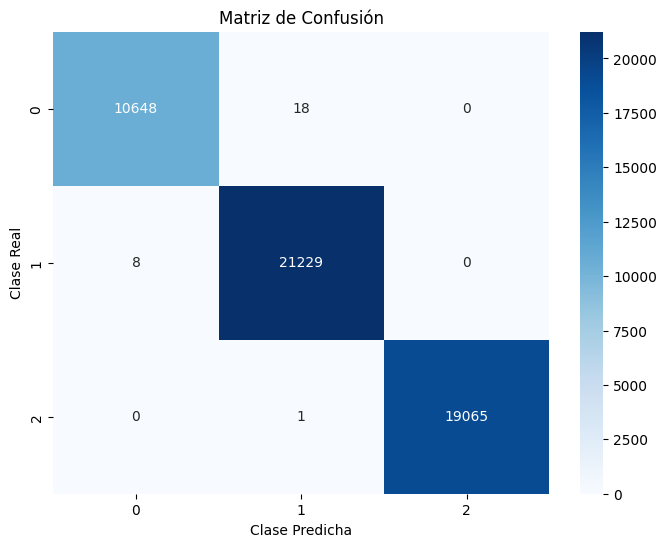

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9967040728242957
Precision:  0.9967039821697924
Precision per class: [0.99633431 0.99641712 0.99724109]
Recall:  0.9967040728242957
Recall per class: [0.99487555 0.99698113 0.99745277]
F1 Score:  0.9967038755992694
F1-score for the class 0: 0.9956043956043956
F1-score for the class 1: 0.996699047439404
F1-score for the class 2: 0.9973469171176907
jaccard: 0.9989413883137794
Confusion Matrix: 
[[2718    8    6]
 [   9 5284    7]
 [   1   11 4699]]


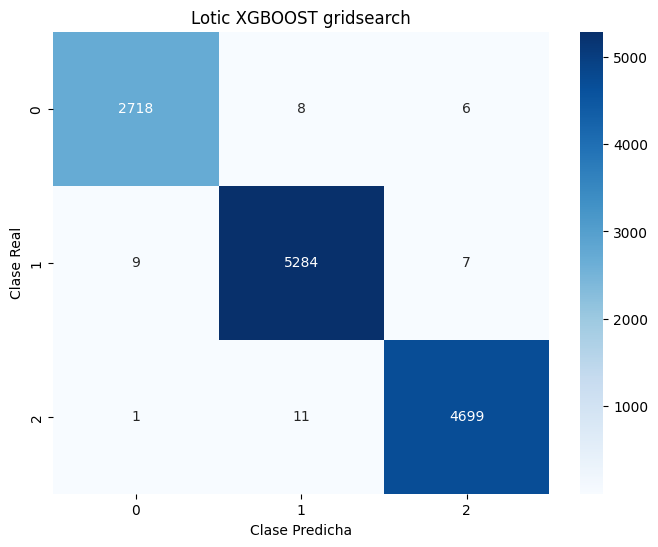

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic XGBOOST gridsearch')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9974160206718347
Precision:  0.9974160206718347
Precision per class: [0.99082569 0.99774266 1.        ]
Recall:  0.9974160206718347
Recall per class: [0.99082569 0.99774266 1.        ]
F1 Score:  0.9974160206718347
F1-score for the class 0: 0.9908256880733946
F1-score for the class 1: 0.9977426636568849
F1-score for the class 2: 1.0
jaccard: 0.9948613518380961
Confusion Matrix: 
[[108   1   0]
 [  1 442   0]
 [  0   0 222]]


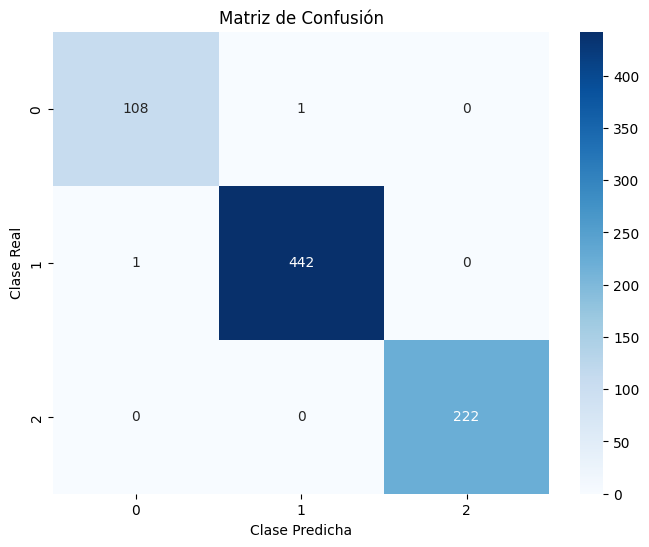

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

#####SVM

In [ ]:
# Define a dictionary of hyperparameters for tuning a SVM model
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto'],
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_svm = SVC()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_svm, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_svm_bin.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


Wait a moment...
Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}, Accuracy: 0.8810327238483874, Best score (cv): 0.8883440341068161
Best model: SVC(C=10, gamma=0.1, kernel='linear')
Best params: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best score: 0.8883440341068161


######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.881751652965528
Precision:  0.9143970421626413
Precision per class: [0.653166   0.97901791 0.98855716]
Recall:  0.881751652965528
Recall per class: [0.96615413 0.73602675 0.99685304]
F1 Score:  0.8845657173587654
F1-score for the class 0: 0.7794123208410544
F1-score for the class 1: 0.8403085772652743
F1-score for the class 2: 0.9926877676799332
jaccard: 0.8041806072809405
Confusion Matrix: 
[[10305   300    61]
 [ 5447 15631   159]
 [   25    35 19006]]


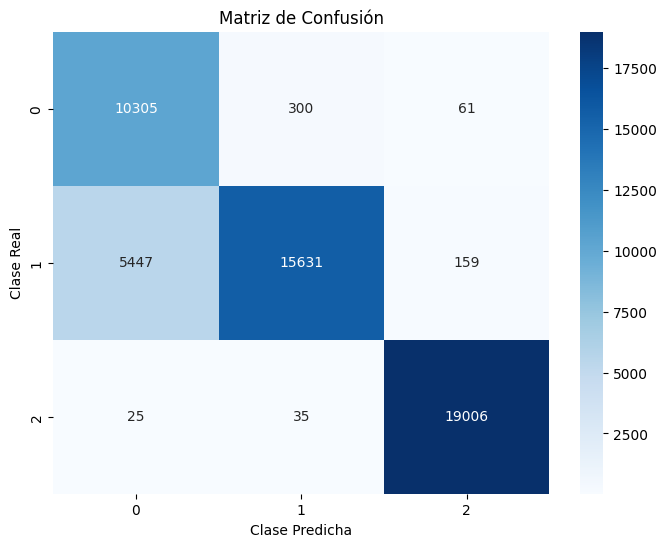

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8810327238483874
Precision:  0.9151126778059762
Precision per class: [0.65427235 0.98124683 0.99197635]
Recall:  0.8810327238483874
Recall per class: [0.97254758 0.73056604 0.9972405 ]
F1 Score:  0.8837610801658898
F1-score for the class 0: 0.7822758722214044
F1-score for the class 1: 0.8375513735669479
F1-score for the class 2: 0.9946014607812004
jaccard: 0.8041806072809405
Confusion Matrix: 
[[2657   67    8]
 [1398 3872   30]
 [   6    7 4698]]


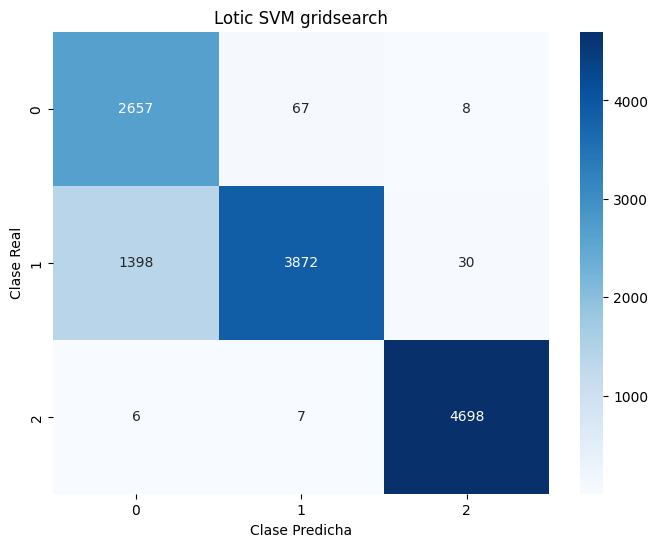

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic SVM gridsearch')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8824289405684754
Precision:  0.9298905563517397
Precision per class: [0.55208333 0.99439776 0.98666667]
Recall:  0.8824289405684754
Recall per class: [0.97247706 0.8013544  1.        ]
F1 Score:  0.8920456475887536
F1-score for the class 0: 0.7043189368770764
F1-score for the class 1: 0.8875
F1-score for the class 2: 0.9932885906040269
jaccard: 0.8161444139965174
Confusion Matrix: 
[[106   2   1]
 [ 86 355   2]
 [  0   0 222]]


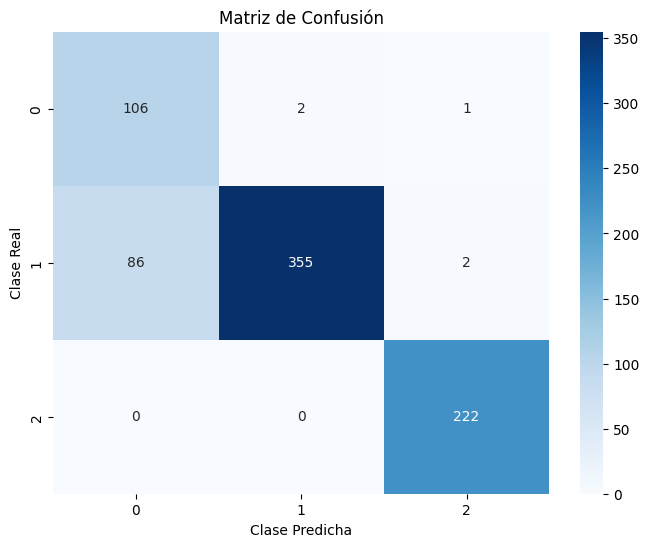

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

#####KNN

In [ ]:
# Define a dictionary of hyperparameters for tuning a KNN model
parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de ponderación
    'p': [1, 2]  # Parámetro para la distancia (1 para la distancia de Manhattan, 2 para la Euclidiana)
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_knn = KNeighborsClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_knn, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_knn_bin.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


Wait a moment...


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}, Accuracy: 0.8646315624264302, Best score (cv): 0.8625635823081854
Best model: KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')
Best params: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best score: 0.8625635823081854


######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[10666     0     0]
 [    0 21237     0]
 [    0     0 19066]]


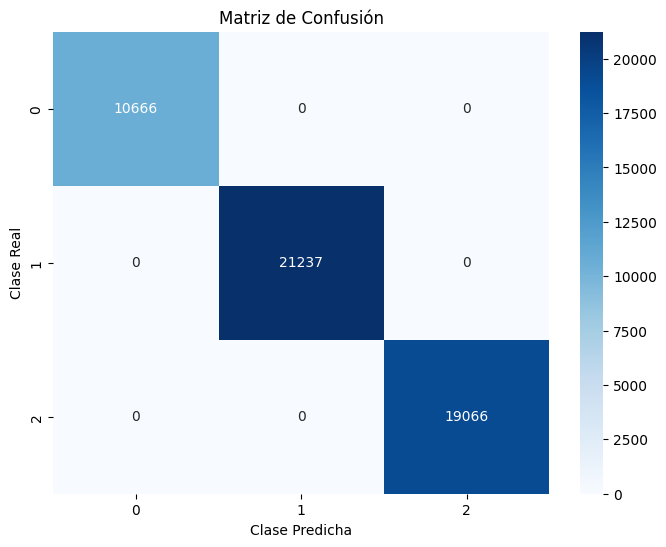

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8646315624264302
Precision:  0.8694970031487771
Precision per class: [0.69348038 0.86467982 0.9769919 ]
Recall:  0.8646315624264302
Recall per class: [0.78257687 0.81018868 0.97346636]
F1 Score:  0.8661179315027562
F1-score for the class 0: 0.7353396388650043
F1-score for the class 1: 0.8365478277810248
F1-score for the class 2: 0.9752259436469963
jaccard: 1.0
Confusion Matrix: 
[[2138  573   21]
 [ 919 4294   87]
 [  26   99 4586]]


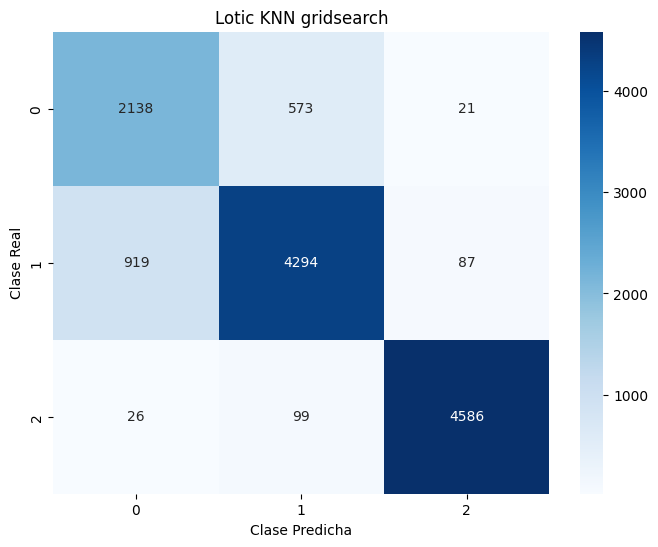

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic KNN gridsearch')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.8708010335917312
Precision:  0.8865992416003398
Precision per class: [0.6        0.93638677 0.9279661 ]
Recall:  0.8708010335917312
Recall per class: [0.79816514 0.83069977 0.98648649]
F1 Score:  0.8746570252874267
F1-score for the class 0: 0.6850393700787402
F1-score for the class 1: 0.8803827751196173
F1-score for the class 2: 0.9563318777292577
jaccard: 0.7862388961522794
Confusion Matrix: 
[[ 87  22   0]
 [ 58 368  17]
 [  0   3 219]]


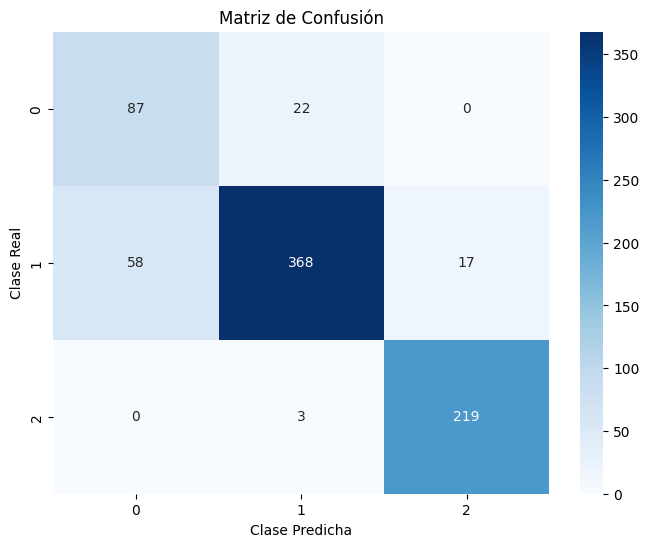

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

#####DT

In [ ]:
# Define a dictionary of hyperparameters for tuning a DT model
parameters = {
    'criterion': ['gini', 'entropy'],  # Criterio para la división de nodos
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en una hoja
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_dt = DecisionTreeClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_dt, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_dt.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


Wait a moment...
Best params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}, Accuracy: 0.9995291532606136, Best score (cv): 0.999882283696292
Best model: DecisionTreeClassifier()
Best params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.999882283696292


######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  1.0
Precision:  1.0
Precision per class: [1. 1. 1.]
Recall:  1.0
Recall per class: [1. 1. 1.]
F1 Score:  1.0
F1-score for the class 0: 1.0
F1-score for the class 1: 1.0
F1-score for the class 2: 1.0
jaccard: 1.0
Confusion Matrix: 
[[10666     0     0]
 [    0 21237     0]
 [    0     0 19066]]


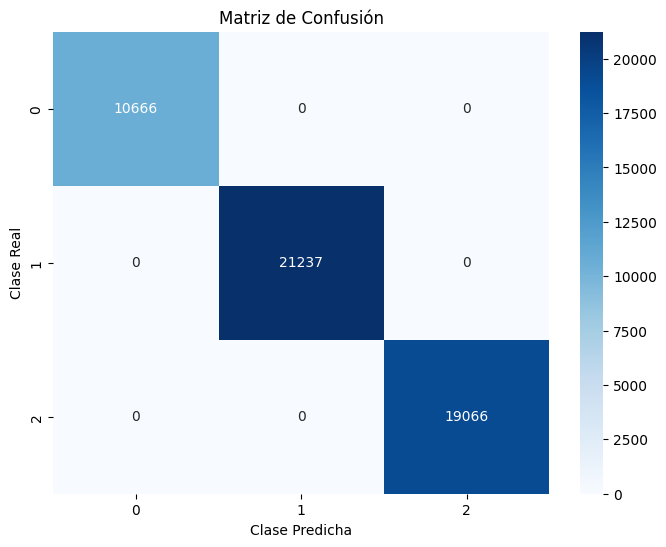

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9995291532606136
Precision:  0.9995292808331492
Precision per class: [0.99963397 0.99924571 0.9997876 ]
Recall:  0.9995291532606136
Recall per class: [0.99963397 0.99981132 0.99915092]
F1 Score:  0.9995291462829871
F1-score for the class 0: 0.9996339677891655
F1-score for the class 1: 0.9995284353484862
F1-score for the class 2: 0.9994691580847224
jaccard: 1.0
Confusion Matrix: 
[[2731    1    0]
 [   0 5299    1]
 [   1    3 4707]]


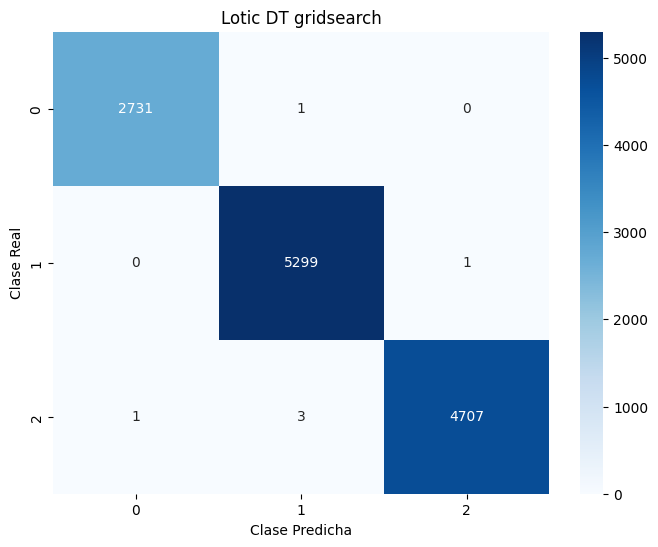

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic DT gridsearch')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9987080103359173
Precision:  0.998713804011541
Precision per class: [1.        1.        0.9955157]
Recall:  0.9987080103359173
Recall per class: [1.         0.99774266 1.        ]
F1 Score:  0.9987087320720339
F1-score for the class 0: 1.0
F1-score for the class 1: 0.9988700564971752
F1-score for the class 2: 0.9977528089887641
jaccard: 0.9974218143474582
Confusion Matrix: 
[[109   0   0]
 [  0 442   1]
 [  0   0 222]]


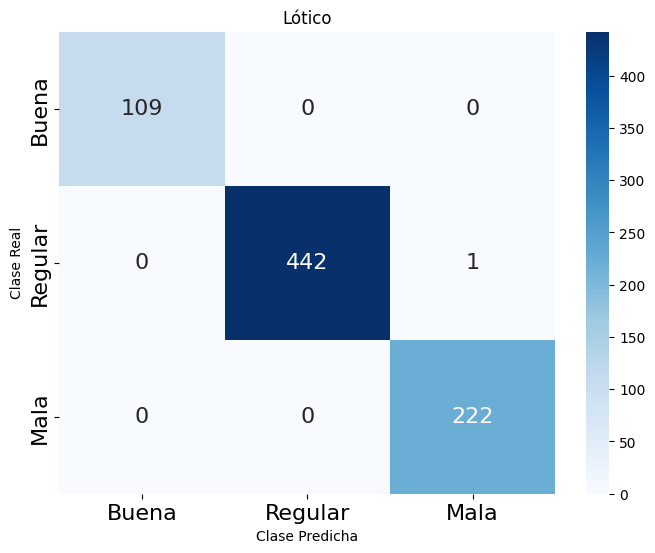

In [ ]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Lótico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####MLR

In [ ]:
# Define a dictionary of hyperparameters for tuning a MLR model
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Método de optimización
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_mlr = LogisticRegression(max_iter=1000)  # Usamos max_iter para evitar advertencias

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_mlr, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_mlr.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


Wait a moment...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Best params: {'C': 100, 'solver': 'newton-cg'}, Accuracy: 0.9563682021502001, Best score (cv): 0.9545213999205178
Best model: LogisticRegression(C=100, max_iter=1000, solver='newton-cg')
Best params: {'C': 100, 'solver': 'newton-cg'}
Best score: 0.9545213999205178


######Metrics

Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9560713374796445
Precision:  0.9604992350746525
Precision per class: [0.85089786 0.98848987 0.99063514]
Recall:  0.9560713374796445
Recall per class: [0.98181136 0.90987428 0.99312913]
F1 Score:  0.9566279869881618
F1-score for the class 0: 0.911678927436556
F1-score for the class 1: 0.9475542478852519
F1-score for the class 2: 0.9918805657412257
jaccard: 0.9184826313525115
Confusion Matrix: 
[[10472   187     7]
 [ 1742 19323   172]
 [   93    38 18935]]


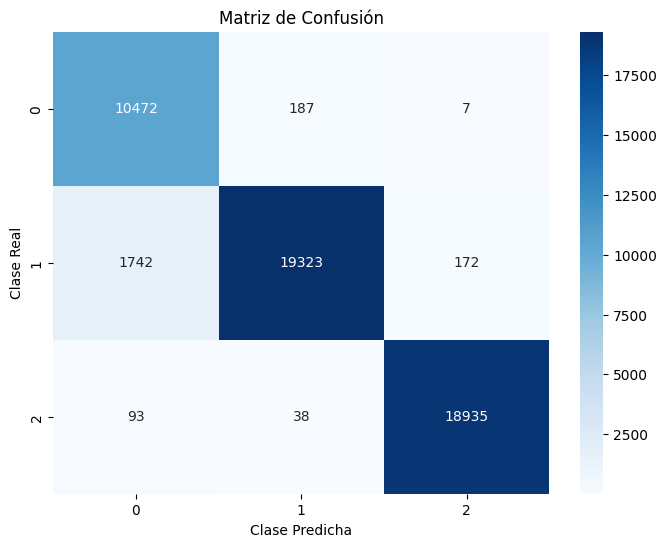

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9563682021502001
Precision:  0.9611740139357917
Precision per class: [0.85006313 0.99053693 0.99257531]
Recall:  0.9563682021502001
Recall per class: [0.98572474 0.90849057 0.99320739]
F1 Score:  0.9569592526833013
F1-score for the class 0: 0.9128813559322034
F1-score for the class 1: 0.9477413640389726
F1-score for the class 2: 0.9928912466843501
jaccard: 0.9184826313525115
Confusion Matrix: 
[[2693   38    1]
 [ 451 4815   34]
 [  24    8 4679]]


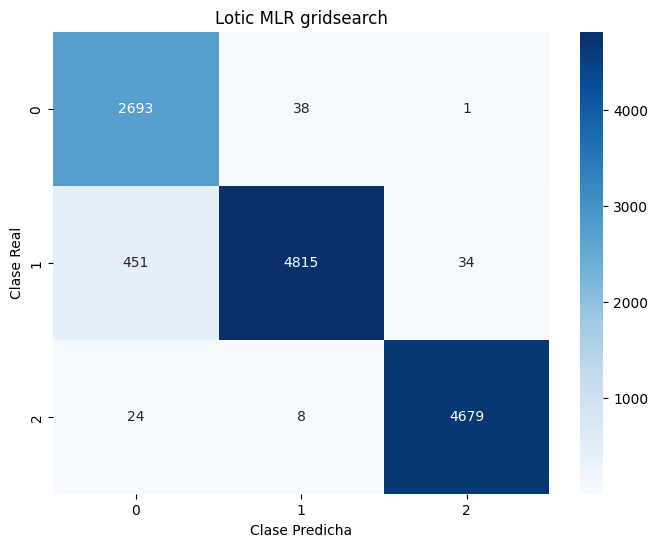

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic MLR gridsearch')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9547803617571059
Precision:  0.9621000101087165
Precision per class: [0.78676471 0.99515738 0.98222222]
Recall:  0.9547803617571059
Recall per class: [0.98165138 0.92776524 0.9954955 ]
F1 Score:  0.9562392085223163
F1-score for the class 0: 0.8734693877551021
F1-score for the class 1: 0.9602803738317757
F1-score for the class 2: 0.9888143176733781
jaccard: 0.9182891438211995
Confusion Matrix: 
[[107   2   0]
 [ 28 411   4]
 [  1   0 221]]


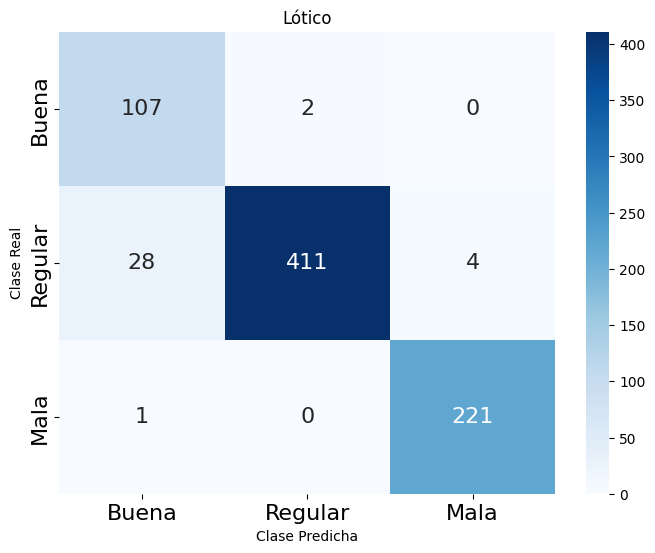

In [ ]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Lótico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


####Balanced classes

#####Separation of data into training and test sets

Apply random subsampling

In [ ]:
print('Before class balancing: ', Counter(y_train_lotic_num))
print("")
rus = RandomUnderSampler(random_state=42)
X_train_lotic_num, y_train_lotic_num = rus.fit_resample(X_train_lotic_num, y_train_lotic_num)
print('After the balancing y:', Counter(y_train_lotic_num))
print("")
print('After the balancing X:', Counter(X_train_lotic_num))

Before class balancing:  Counter({1: 26537, 2: 23777, 0: 13398})

After the balancing y: Counter({0: 13398, 1: 13398, 2: 13398})

After the balancing X: Counter({'SST': 1, 'CF': 1, 'E_COLI': 1, 'OD%': 1, 'DBO5': 1, 'DQO': 1, 'TOX_D48': 1, 'TOX_V15': 1})


In [ ]:
# Guardar el conjunto de entrenamiento en un archivo Excel
#X_train_b_coa.to_excel("train_data_b_coa.xlsx", index=False)
#y_train_b_coa.to_excel("train_labels_data_b_coa.xlsx", index=False)

# Guardar el conjunto de prueba en un archivo Excel
#X_test_b_coa.to_excel("test_data_b_coa.xlsx", index=False)
#y_test_b_coa.to_excel("test_labels_data_b_coa.xlsx", index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_lotic_num, y_train_lotic_num, test_size= 0.2, random_state=42)

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((32155, 8), (8039, 8))

#####XGBOOST

In [ ]:
# Define a dictionary of hyperparameters for tuning a XGBoost model
parameters = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 30, 50],
    'n_estimators': [100, 200, 300],
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_xgb = XGBClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_xgb, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_xgb.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


Wait a moment...
Best params: {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 300}, Accuracy: 0.9971389476303023, Best score (cv): 0.9977608459026591
Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Best params: {'learning_rate': 0.1, 'max_depth': 30, 'n_estimators'

######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.999968900637537
Precision:  0.9999689035448346
Precision per class: [0.99990652 1.         1.        ]
Recall:  0.999968900637537
Recall per class: [1.         0.99990737 1.        ]
F1 Score:  0.9999689006442026
F1-score for the class 0: 0.9999532557378582
F1-score for the class 1: 0.9999536844055393
F1-score for the class 2: 1.0
jaccard: 0.9999378041823715
Confusion Matrix: 
[[10696     0     0]
 [    1 10795     0]
 [    0     0 10663]]


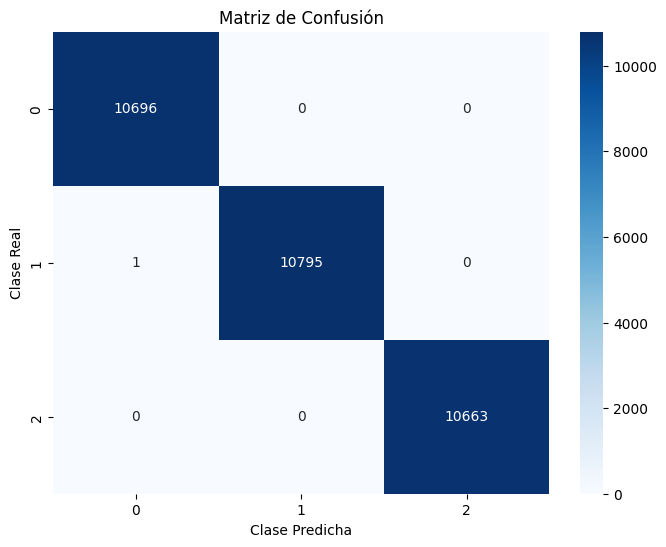

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9971389476303023
Precision:  0.9971391360023062
Precision per class: [0.99778189 0.99615975 0.9974359 ]
Recall:  0.9971389476303023
Recall per class: [0.99888971 0.99692544 0.99561243]
F1 Score:  0.997138607120058
F1-score for the class 0: 0.9983354910301461
F1-score for the class 1: 0.996542451018056
F1-score for the class 2: 0.996523330283623
jaccard: 0.9999378041823715
Confusion Matrix: 
[[2699    2    1]
 [   2 2594    6]
 [   4    8 2723]]


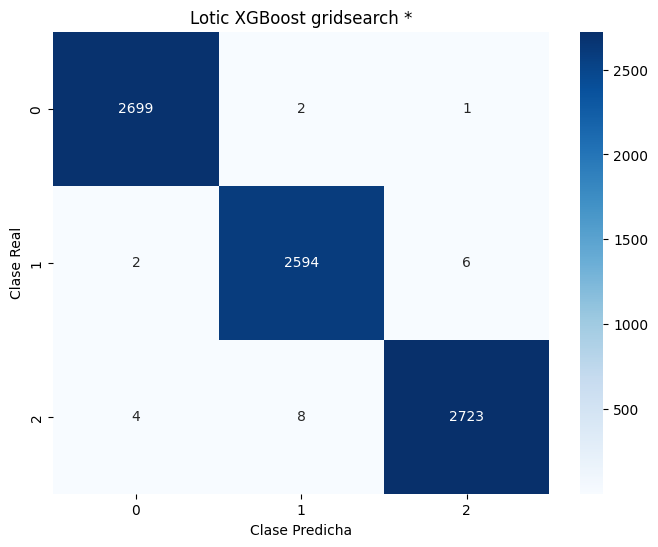

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic XGBoost gridsearch *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

Accuracy:  0.9987080103359173
Precision:  0.9987197556964998
Precision per class: [0.99090909 1.         1.        ]
Recall:  0.9987080103359173
Recall per class: [1.         0.99774266 1.        ]
F1 Score:  0.9987102301463455
F1-score for the class 0: 0.9954337899543378
F1-score for the class 1: 0.9988700564971752
F1-score for the class 2: 1.0
jaccard: 0.9974277660324172
Confusion Matrix: 
[[109   0   0]
 [  1 442   0]
 [  0   0 222]]


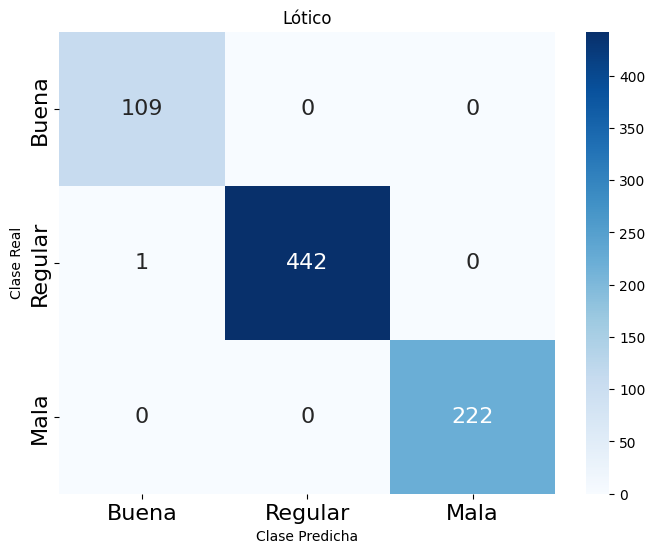

In [ ]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Lótico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####SVM

In [ ]:
# Define a dictionary of hyperparameters for tuning a SVM model
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto'],
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_svm = SVC()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_svm, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_svm.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


Wait a moment...


######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic SVM gridsearch *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Lótico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####KNN

In [ ]:
# Define a dictionary of hyperparameters for tuning a KNN model
parameters = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipo de ponderación
    'p': [1, 2]  # Parámetro para la distancia (1 para la distancia de Manhattan, 2 para la Euclidiana)
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_knn = KNeighborsClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_knn, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_knn.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic KNN gridsearch *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Lótico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####DT

In [ ]:
# Define a dictionary of hyperparameters for tuning a DT model
parameters = {
    'criterion': ['gini', 'entropy'],  # Criterio para la división de nodos
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas en una hoja
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_dt = DecisionTreeClassifier()

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_dt, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_dt.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic DT gridsearch *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Lótico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####MLR

In [ ]:
# Define a dictionary of hyperparameters for tuning a MLR model
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Método de optimización
}

# Inform the user to wait during the hyperparameter search
print("Wait a moment...")

# Inicializar el estimador (modelo)
model_lotic_mlr = LogisticRegression(max_iter=1000)  # Usamos max_iter para evitar advertencias

# Inicializar el GridSearchCV
grid_search = GridSearchCV(model_lotic_mlr, parameters, cv=5, scoring='accuracy')

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener la mejor combinación de hiperparámetros
best_params = grid_search.best_params_

# Obtener el mejor modelo entrenado
best_model = grid_search.best_estimator_

# Obtener el mejor score
best_score = grid_search.best_score_

# Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_scaled)

# Calcular la métrica de evaluación (por ejemplo, precisión)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los resultados
print("Best params: {}, Accuracy: {}, Best score (cv): {}".format(best_params, accuracy, best_score))

# Guardar el mejor modelo en un archivo
#with open('best_model_lotic_mlr.pkl', 'wb') as model_file:
#    pickle.dump(best_model, model_file)

# Imprimir el mejor modelo, los mejores parámetros y el mejor score
print("Best model:", best_model)
print("Best params:", best_params)
print("Best score:", best_score)


######Metrics

 Evaluate the model on the training set

In [ ]:
# Make predictions on the training set
y_pred = best_model.predict(X_train_scaled)

# Evaluation metrics on the training set
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_train, y_pred, average=None)
recall = recall_score(y_train, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_train, y_pred, average=None)
f1 = f1_score(y_train, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_train, y_pred, average=None)
jaccard = jaccard_score(y_train, y_pred, average='weighted')
confusion = confusion_matrix(y_train, y_pred)

# Print evaluation metrics for the training set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_train, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusión')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the test set

In [ ]:
# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)

# Evaluation metrics on the testing set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_test, y_pred, average=None)
jaccard_t = jaccard_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

# Print evaluation metrics for the testing set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
classes = [0, 1, 2]  # Por ejemplo, si tus clases son 0, 1 y 2

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Lotic MLR gridsearch *')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()

 Evaluate the model on the validation set

In [ ]:
# Transform the validation data using the scaler trained on the validation data
X_val = scaler.transform(X_val_lotic_num)

# Make predictions on the validation set using the trained xgboost model
y_pred = best_model.predict(X_val)

# Evaluation metrics on the validation set
accuracy = accuracy_score(y_val_lotic_num, y_pred)
precision = precision_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate precision for each class
precision_x_class = precision_score(y_val_lotic_num, y_pred, average=None)
recall = recall_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate recall for each class
recall_x_class = recall_score(y_val_lotic_num, y_pred, average=None)
f1 = f1_score(y_val_lotic_num, y_pred, average='weighted')
# Calculate f1 score for each class
f1_score_x_class = f1_score(y_val_lotic_num, y_pred, average=None)
jaccard = jaccard_score(y_val_lotic_num, y_pred, average='weighted')
confusion = confusion_matrix(y_val_lotic_num, y_pred)

# Print evaluation metrics for the validation set
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Precision per class:" , precision_x_class)
print("Recall: ", recall)
print("Recall per class:" , recall_x_class)
print("F1 Score: ", f1)
# Print F1-score for each class
for clase, f1 in enumerate(f1_score_x_class):
    print(f"F1-score for the class {clase}: {f1}")
print("jaccard:" , jaccard)
print("Confusion Matrix: ")
print(confusion)

In [ ]:
# Definir las etiquetas de las clases
classes = ['Buena', 'Regular', 'Mala']

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_val_lotic_num, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes, annot_kws={"size": 16})

# Ajustar el tamaño de los valores de la matriz de confusión
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title('Lótico')
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.show()


#####Empaquetado del escalador

In [ ]:
# Save the scaler used for preprocessing to a file
#with open('scaler_coa.pkl', 'wb') as scaler_file:
#    pickle.dump(scaler_coa, scaler_file)

In [ ]:
print("acabo aqui")